### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.

# 

# Assignment activity 2

### Prepare your workstation

In [161]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [162]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head()
ad.tail()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

sub_icb_location_code sub_icb_location_ons_code  \
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137788  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137789  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137790  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137788        30-Jun-22   31-60 Minutes                    430  
137789        30-Jun-22   21-30 Minutes                    751  
137790        30-Jun-22   16-20 Minutes                    921  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

In [163]:
# Determine whether there are missing values.
ad.shape

(137793, 8)

In [164]:
#Find out of the column names.
ad.columns

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')

In [165]:
    #Creating a new Df as 'ad_na' so as not to override the existing one.
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape
    #the output here tells us that there are no rows with NAN in 8 columns...

(0, 8)

In [166]:
#as an alternative isna() and sum() functions to find out missing values with a tabular view
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [167]:
# Determine the metadata of the data set.
    #using info() function to find the Columns,dtype etc.
ad.info()
    #or
ad.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [168]:
    #Using describe() function to see some statistics.
ad.describe()

count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000

In [169]:
# Determine the descriptive statistics of the data set.
    #includes all.
ad.describe(include='all')

sub_icb_location_code sub_icb_location_ons_code  \
count                 137793                    137793   
unique                   106                       106   
top                      26A                 E38000239   
freq                    1484                      1484   
mean                     NaN                       NaN   
std                      NaN                       NaN   
min                      NaN                       NaN   
25%                      NaN                       NaN   
50%                      NaN                       NaN   
75%                      NaN                       NaN   
max                      NaN                       NaN   

                    sub_icb_location_name icb_ons_code region_ons_code  \
count                              137793       137793          137793   
unique                                106           42               7   
top     NHS Norfolk and Waveney ICB - 26A    E54000057       E40000010   
freq                                 1484        12668           33112   
mean                                  NaN          NaN             NaN   
std                                   NaN          NaN             NaN   
min                                   NaN          NaN             NaN   
25%                                   NaN          NaN             NaN   
50%                                   NaN          NaN             NaN   
75%                                   NaN          NaN             NaN   
max                                   NaN          NaN             NaN   

       appointment_date         actual_duration  count_of_appointments  
count            137793                  137793          137793.000000  
unique              212                       7                    NaN  
top           01-Dec-21  Unknown / Data Quality                    NaN  
freq                742                   20161                    NaN  
mean                NaN                     NaN            1219.080011  
std                 NaN                     NaN            1546.902956  
min                 NaN                     NaN               1.000000  
25%                 NaN                     NaN             194.000000  
50%                 NaN                     NaN             696.000000  
75%                 NaN                     NaN            1621.000000  
max                 NaN                     NaN           15400.000000

In [170]:
#Self-Summary table for future analysis 
ad.groupby('actual_duration')[['count_of_appointments']].sum()\
    .sort_values(by='count_of_appointments', ascending=False)

count_of_appointments
actual_duration                              
Unknown / Data Quality               40284086
6-10 Minutes                         33800815
1-5 Minutes                          28600865
11-15 Minutes                        25160882
16-20 Minutes                        16004247
21-30 Minutes                        15026365
31-60 Minutes                         9103432

In [171]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame using with head functions.
ar.head(5)
    #or tail function
ar.tail(5)

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10

In [172]:
      #Using shape function to for overall image.
ar.shape

(596821, 7)

In [173]:
# Determine whether there are missing values.

    #Creating a new Df as 'ar_na' so as not to override the existing one.
    
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape
    #the output here tells us that there are no rows with NAN in 7 columns...


(0, 7)

In [174]:
    #Also isnull() function could be usefull if we have smaller dataset to look for 'False'
ar.isnull()

icb_ons_code  appointment_month  appointment_status  hcp_type  \
0              False              False               False     False   
1              False              False               False     False   
2              False              False               False     False   
3              False              False               False     False   
4              False              False               False     False   
...              ...                ...                 ...       ...   
596816         False              False               False     False   
596817         False              False               False     False   
596818         False              False               False     False   
596819         False              False               False     False   
596820         False              False               False     False   

        appointment_mode  time_between_book_and_appointment  \
0                  False                              False   
1                  False                              False   
2                  False                              False   
3                  False                              False   
4                  False                              False   
...                  ...                                ...   
596816             False                              False   
596817             False                              False   
596818             False                              False   
596819             False                              False   
596820             False                              False   

        count_of_appointments  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
...                       ...  
596816                  False  
596817                  False  
596818                  False  
596819                  False  
596820                  False  

[596821 rows x 7 columns]

In [175]:
    #To see ANY NULL (missing) VALUES in other method.
ar.isnull().values.any()

False

In [176]:
# Determine the metadata of the data set.
    #using the info() function about a DataFrame including the index dtype and columns, non-null values and memory usage.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [177]:
    #Also count() function to see the non-NA cells for each column
ar.count()

icb_ons_code                         596821
appointment_month                    596821
appointment_status                   596821
hcp_type                             596821
appointment_mode                     596821
time_between_book_and_appointment    596821
count_of_appointments                596821
dtype: int64

In [178]:
# Determine the descriptive statistics of the data set.
ar.describe()

count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

In [179]:
    #For Deep down describe all.
ar.describe(include='all')

icb_ons_code appointment_month appointment_status  \
count        596821            596821             596821   
unique           42                30                  3   
top       E54000057           2020-03           Attended   
freq          54527             21350             232137   
mean            NaN               NaN                NaN   
std             NaN               NaN                NaN   
min             NaN               NaN                NaN   
25%             NaN               NaN                NaN   
50%             NaN               NaN                NaN   
75%             NaN               NaN                NaN   
max             NaN               NaN                NaN   

                    hcp_type appointment_mode  \
count                 596821           596821   
unique                     3                5   
top     Other Practice staff     Face-to-Face   
freq                  241557           180410   
mean                     NaN              NaN   
std                      NaN              NaN   
min                      NaN              NaN   
25%                      NaN              NaN   
50%                      NaN              NaN   
75%                      NaN              NaN   
max                      NaN              NaN   

       time_between_book_and_appointment  count_of_appointments  
count                             596821          596821.000000  
unique                                 8                    NaN  
top                             Same Day                    NaN  
freq                               95502                    NaN  
mean                                 NaN            1244.601857  
std                                  NaN            5856.887042  
min                                  NaN               1.000000  
25%                                  NaN               7.000000  
50%                                  NaN              47.000000  
75%                                  NaN             308.000000  
max                                  NaN          211265.000000

In [180]:
# ar 'did not attend (DNA)' summary table with ar_DNA_summary df

ar_DNA_summary = ar[(ar['appointment_status'] == 'DNA')
                    ].groupby('appointment_month').sum()
ar_DNA_summary.describe().applymap('{:,.2f}'.format)

count_of_appointments
count                 30.00
mean           1,030,374.43
std              270,182.50
min              449,057.00
25%              895,250.50
50%            1,037,911.00
75%            1,199,355.00
max            1,565,624.00

In [181]:
# Import and sense-check the national_categories.xlsx data set as nc.
import pandas as pd

In [182]:
nc = pd.read_excel('national_categories.xlsx')
nc

appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                                            ...                        ...   
817389              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817390              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817391              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817392              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817393              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   

                  context_type                       national_category  \
0       Care Related Encounter  Patient contact during Care Home Round   
1       Care Related Encounter                         Planned Clinics   
2       Care Related Encounter                              Home Visit   
3       Care Related Encounter              General Consultation Acute   
4       Care Related Encounter            Structured Medication Review   
...                        ...                                     ...   
817389  Care Related Encounter             Unplanned Clinical Activity   
817390  Care Related Encounter                         Planned Clinics   
817391  Care Related Encounter              Planned Clinical Procedure   
817392  Care Related Encounter            General Consultation Routine   
817393  Care Related Encounter              General Consultation Acute   

        count_of_appointments appointment_month  
0                           3           2021-08  
1                           7           2021-08  
2                          79           2021-08  
3                         725           2021-08  
4                           2           2021-08  
...                       ...               ...  
817389                     12           2022-06  
817390                      4           2022-06  
817391                     92           2022-06  
817392                      4           2022-06  
817393                     19           2022-06  

[817394 rows x 8 columns]

In [24]:
# View the DataFrame.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [ ]:
whos

In [185]:
# Determine whether there are missing values.
nc.isnull().values.any()

False

In [186]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [187]:
# Determine the descriptive statistics of the data set.
nc.describe(include='all')


appointment_date icb_ons_code              sub_icb_location_name  \
count                817394       817394                             817394   
unique                  334           42                                106   
top     2022-06-28 00:00:00    E54000057  NHS North West London ICB - W2U3Z   
freq                   3536        59180                              13007   
first   2021-08-01 00:00:00          NaN                                NaN   
last    2022-06-30 00:00:00          NaN                                NaN   
mean                    NaN          NaN                                NaN   
std                     NaN          NaN                                NaN   
min                     NaN          NaN                                NaN   
25%                     NaN          NaN                                NaN   
50%                     NaN          NaN                                NaN   
75%                     NaN          NaN                                NaN   
max                     NaN          NaN                                NaN   

         service_setting            context_type     national_category  \
count             817394                  817394                817394   
unique                 5                       3                    18   
top     General Practice  Care Related Encounter  Inconsistent Mapping   
freq              359274                  700481                 89494   
first                NaN                     NaN                   NaN   
last                 NaN                     NaN                   NaN   
mean                 NaN                     NaN                   NaN   
std                  NaN                     NaN                   NaN   
min                  NaN                     NaN                   NaN   
25%                  NaN                     NaN                   NaN   
50%                  NaN                     NaN                   NaN   
75%                  NaN                     NaN                   NaN   
max                  NaN                     NaN                   NaN   

        count_of_appointments appointment_month  
count           817394.000000            817394  
unique                    NaN                11  
top                       NaN           2022-03  
freq                      NaN             82822  
first                     NaN               NaN  
last                      NaN               NaN  
mean               362.183684               NaN  
std               1084.576600               NaN  
min                  1.000000               NaN  
25%                  7.000000               NaN  
50%                 25.000000               NaN  
75%                128.000000               NaN  
max              16590.000000               NaN

In [188]:
nc.describe()

count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [189]:
# Determine the number of locations with unique values
nc['sub_icb_location_name'].nunique()

106

In [27]:
# Determine the number of locations with group by and count
loc1 = nc.groupby(['sub_icb_location_name'])['sub_icb_location_name'].count()
loc1.size
nc_locations_codes = nc['icb_ons_code'].value_counts()
print(loc1.size,nc_locations_codes.count())


106 42


In [28]:
#Also exploring the database.
loc1 = nc.groupby('sub_icb_location_name').count()
loc1

appointment_date  \
sub_icb_location_name                                                  
NHS Bath and North East Somerset Swindon and Wi...             11545   
NHS Bedfordshire Luton and Milton Keynes ICB - ...              9490   
NHS Birmingham and Solihull ICB - 15E                          11789   
NHS Black Country ICB - D2P2L                                  11776   
NHS Bristol North Somerset and South Gloucester...              9673   
...                                                              ...   
NHS West Yorkshire ICB - 02T                                    7072   
NHS West Yorkshire ICB - 03R                                    7990   
NHS West Yorkshire ICB - 15F                                    9478   
NHS West Yorkshire ICB - 36J                                    8282   
NHS West Yorkshire ICB - X2C4Y                                 10066   

                                                    icb_ons_code  \
sub_icb_location_name                                              
NHS Bath and North East Somerset Swindon and Wi...         11545   
NHS Bedfordshire Luton and Milton Keynes ICB - ...          9490   
NHS Birmingham and Solihull ICB - 15E                      11789   
NHS Black Country ICB - D2P2L                              11776   
NHS Bristol North Somerset and South Gloucester...          9673   
...                                                          ...   
NHS West Yorkshire ICB - 02T                                7072   
NHS West Yorkshire ICB - 03R                                7990   
NHS West Yorkshire ICB - 15F                                9478   
NHS West Yorkshire ICB - 36J                                8282   
NHS West Yorkshire ICB - X2C4Y                             10066   

                                                    service_setting  \
sub_icb_location_name                                                 
NHS Bath and North East Somerset Swindon and Wi...            11545   
NHS Bedfordshire Luton and Milton Keynes ICB - ...             9490   
NHS Birmingham and Solihull ICB - 15E                         11789   
NHS Black Country ICB - D2P2L                                 11776   
NHS Bristol North Somerset and South Gloucester...             9673   
...                                                             ...   
NHS West Yorkshire ICB - 02T                                   7072   
NHS West Yorkshire ICB - 03R                                   7990   
NHS West Yorkshire ICB - 15F                                   9478   
NHS West Yorkshire ICB - 36J                                   8282   
NHS West Yorkshire ICB - X2C4Y                                10066   

                                                    context_type  \
sub_icb_location_name                                              
NHS Bath and North East Somerset Swindon and Wi...         11545   
NHS Bedfordshire Luton and Milton Keynes ICB - ...          9490   
NHS Birmingham and Solihull ICB - 15E                      11789   
NHS Black Country ICB - D2P2L                              11776   
NHS Bristol North Somerset and South Gloucester...          9673   
...                                                          ...   
NHS West Yorkshire ICB - 02T                                7072   
NHS West Yorkshire ICB - 03R                                7990   
NHS West Yorkshire ICB - 15F                                9478   
NHS West Yorkshire ICB - 36J                                8282   
NHS West Yorkshire ICB - X2C4Y                             10066   

                                                    national_category  \
sub_icb_location_name                                                   
NHS Bath and North East Somerset Swindon and Wi...              11545   
NHS Bedfordshire Luton and Milton Keynes ICB - ...               9490   
NHS Birmingham and Solihull ICB - 15E                           11789   
NHS Black Country ICB - D2P2L                           

**Question 2:** What are the five locations with the highest number of records?



In [38]:
# Determine the top five locations based on record count.
nc_altern = nc['sub_icb_location_name'].value_counts()
nc_altern.head(5)

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [39]:
# Determine the number of service settings.
nc['service_setting'].nunique()

5

In [40]:
# Determine the number of context types.
number_context_types = nc['context_type'].value_counts()
number_context_types.size

3

In [41]:
# Determine the number of national categories.
number_national_categories = nc['national_category'].value_counts()
number_national_categories.size

18

In [42]:
# Determine the number of appointment status.
number_appointment_status = ar.groupby(['appointment_status']).count()
number_appointment_status.head()
#used .head() function for tabular view because there are only 3 appointment_status.

icb_ons_code  appointment_month  hcp_type  \
appointment_status                                              
Attended                  232137             232137    232137   
DNA                       163360             163360    163360   
Unknown                   201324             201324    201324   

                    appointment_mode  time_between_book_and_appointment  \
appointment_status                                                        
Attended                      232137                             232137   
DNA                           163360                             163360   
Unknown                       201324                             201324   

                    count_of_appointments  
appointment_status                         
Attended                           232137  
DNA                                163360  
Unknown                            201324

# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [190]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format
ff_ad = ad['appointment_date'].head(5)
ff_ad
#datatype is object(string)

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [192]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
ff_nc = nc['appointment_date'].head(5)
#First_five
#datatype is object
ff_nc
#datatype is datetime64

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [45]:
# Change the date format of ad['appointment_date'].
    # ad['appointment_date'] structed as 01-Dec-21 we need to sperate the str date with '-' between d m y as %d-%b-%y .

pd.to_datetime(ad['appointment_date'],format='%d-%b-%y')

# View the DateFrame.


0        2021-12-01
1        2021-12-01
2        2021-12-01
3        2021-12-01
4        2021-12-01
            ...    
137788   2022-06-30
137789   2022-06-30
137790   2022-06-30
137791   2022-06-30
137792   2022-06-30
Name: appointment_date, Length: 137793, dtype: datetime64[ns]

In [46]:
# Change the date format of ar['appointment_date'].
    #There is no column called ar['appointment_date'] and I will change the ar['appointment_month']
    
    #appointment_month is str
# Change the date format of ar['appointment_month'] which is 2022-06

pd.to_datetime(ar['appointment_month'],format='%Y-%m')


0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
596816   2022-06-01
596817   2022-06-01
596818   2022-06-01
596819   2022-06-01
596820   2022-06-01
Name: appointment_month, Length: 596821, dtype: datetime64[ns]

In [47]:
# Determine the minimum and maximum dates in the ad DataFrame.

ad['appointment_date'].agg(['min', 'max'])

print(min(ad['appointment_date']), 'as minumum')

print(max(ad['appointment_date']), 'as maximum')

# Use appropriate docstrings.



01-Apr-22 as minumum
31-May-22 as maximum


In [48]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
nc['appointment_date'].agg(['min', 'max'])

min   2021-08-01
max   2022-06-30
Name: appointment_date, dtype: datetime64[ns]

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [49]:
#filtered with location.
df2 = nc.loc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')]
df2

appointment_date icb_ons_code              sub_icb_location_name  \
794321       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794322       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794323       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794324       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794325       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
...                 ...          ...                                ...   
807323       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807324       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807325       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807326       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807327       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   

                  service_setting            context_type  \
794321                   Unmapped                Unmapped   
794322                      Other    Inconsistent Mapping   
794323           General Practice    Inconsistent Mapping   
794324           General Practice  Care Related Encounter   
794325           General Practice  Care Related Encounter   
...                           ...                     ...   
807323  Extended Access Provision  Care Related Encounter   
807324  Extended Access Provision  Care Related Encounter   
807325  Extended Access Provision  Care Related Encounter   
807326  Extended Access Provision  Care Related Encounter   
807327           General Practice  Care Related Encounter   

                                        national_category  \
794321                                           Unmapped   
794322                               Inconsistent Mapping   
794323                               Inconsistent Mapping   
794324                                            Walk-in   
794325                                    Planned Clinics   
...                                                   ...   
807323                         Planned Clinical Procedure   
807324                       General Consultation Routine   
807325                         General Consultation Acute   
807326                                    Clinical Triage   
807327  Service provided by organisation external to t...   

        count_of_appointments appointment_month  
794321                    607           2021-08  
794322                      6           2021-08  
794323                     47           2021-08  
794324                     74           2021-08  
794325                     98           2021-08  
...                       ...               ...  
807323                      6           2022-06  
807324                     25           2022-06  
807325                    217           2022-06  
807326                    103           2022-06  
807327                     24           2022-06  

[13007 rows x 8 columns]

In [50]:
# filtered in time framed.
df3 = df2[(df2['appointment_date'] >= '2022-01-01') & (df2['appointment_date'] <= '2022-06-01')]

df3


appointment_date icb_ons_code              sub_icb_location_name  \
800289       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800290       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800291       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800292       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800293       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
...                 ...          ...                                ...   
806220       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   
806221       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   
806222       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   
806223       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   
806224       2022-06-01    E54000027  NHS North West London ICB - W2U3Z   

                  service_setting            context_type  \
800289                   Unmapped                Unmapped   
800290       Primary Care Network  Care Related Encounter   
800291                      Other    Inconsistent Mapping   
800292           General Practice    Inconsistent Mapping   
800293       Primary Care Network  Care Related Encounter   
...                           ...                     ...   
806220  Extended Access Provision  Care Related Encounter   
806221  Extended Access Provision  Care Related Encounter   
806222           General Practice  Care Related Encounter   
806223  Extended Access Provision  Care Related Encounter   
806224  Extended Access Provision  Care Related Encounter   

                   national_category  count_of_appointments appointment_month  
800289                      Unmapped                    496           2022-01  
800290               Clinical Triage                     19           2022-01  
800291          Inconsistent Mapping                      1           2022-01  
800292          Inconsistent Mapping                     16           2022-01  
800293               Planned Clinics                     29           2022-01  
...                              ...                    ...               ...  
806220                    Home Visit                      4           2022-06  
806221  General Consultation Routine                     27           2022-06  
806222   Unplanned Clinical Activity                    626           2022-06  
806223    General Consultation Acute                    224           2022-06  
806224               Clinical Triage                     96           2022-06  

[5936 rows x 8 columns]

In [51]:
#group by function.
df4 = df3.groupby(['service_setting'])['count_of_appointments'].sum()
NHSNWL = df4.sort_values(ascending=False)
NHSNWL

service_setting
General Practice             4804239
Unmapped                      391106
Other                         152897
Primary Care Network          109840
Extended Access Provision      98159
Name: count_of_appointments, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [52]:
# Number of appointments per month == sum of count_of_appointments by month.
appointments_per_month = nc.groupby('appointment_month')['count_of_appointments'].sum()

# Use the groupby() and sort_values() functions.
appointments_per_month_sorted = appointments_per_month.sort_values(ascending=False)

#results/answer is the 11th month.
print("Number of appointments per months below:", appointments_per_month_sorted)

Number of appointments per months below: appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2022-05    27495508
2022-06    25828078
2022-01    25635474
2022-02    25355260
2021-12    25140776
2022-04    23913060
2021-08    23852171
Name: count_of_appointments, dtype: int64


**Question 4:** What was the total number of records per month?

In [53]:
# Total number of records per month.
Total_pm = nc.groupby(['appointment_month'])['count_of_appointments'].sum()
Total_pm.sort_values(ascending=False)

appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2022-05    27495508
2022-06    25828078
2022-01    25635474
2022-02    25355260
2021-12    25140776
2022-04    23913060
2021-08    23852171
Name: count_of_appointments, dtype: int64

In [54]:
#total number of records per month as service_setting catagory 
SSPM = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum()
SSPM.sort_values(ascending=False)


appointment_month  service_setting          
2021-11            General Practice             27767889
2021-10            General Practice             27606171
2022-03            General Practice             27187368
2021-09            General Practice             25940821
2022-05            General Practice             25238620
2022-06            General Practice             23680374
2022-01            General Practice             23583053
2022-02            General Practice             23305934
2021-12            General Practice             23008818
2022-04            General Practice             21916791
2021-08            General Practice             21575852
2021-10            Unmapped                      1366656
2021-09            Unmapped                      1336115
2021-11            Unmapped                      1256496
2021-08            Unmapped                      1233843
2021-12            Unmapped                       954257
2022-03            Unmapped                

# 

In [55]:
    # Additional analysis:Generate a ranking of the locations that have the highest percentage of missed appts

# exclude unknown appointment status, group by location code

ar_loc_known = ar[(ar['appointment_status'] != 'Unknown')].groupby('icb_ons_code')\
    .sum().sort_values(by='count_of_appointments', ascending=False).reset_index()

# rename column names for clarity
ar_loc_known = ar_loc_known.rename(
    columns={'count_of_appointments': 'known appointments'})
ar_loc_known

icb_ons_code  known appointments
0     E54000050            41051227
1     E54000054            34342321
2     E54000057            32256474
3     E54000008            31540433
4     E54000027            28135234
5     E54000029            22584210
6     E54000042            21994258
7     E54000051            21865199
8     E54000044            21648831
9     E54000053            21480171
10    E54000032            21441446
11    E54000048            20546511
12    E54000030            19266029
13    E54000061            18303784
14    E54000037            18239474
15    E54000031            17245050
16    E54000025            16797067
17    E54000062            16673410
18    E54000028            15869842
19    E54000060            15289473
20    E54000055            15254706
21    E54000015            14950854
22    E54000022            14720364
23    E54000058            13980063
24    E54000026            13530234
25    E54000023            13088676
26    E54000040            12933306
27    E54000010            12542577
28    E54000056            12361323
29    E54000039            12006101
30    E54000052            11804146
31    E54000024            11744042
32    E54000018            11691273
33    E54000019            11098914
34    E54000041            10562706
35    E54000013             9876459
36    E54000059             9542996
37    E54000036             9067138
38    E54000034             8831587
39    E54000043             8765625
40    E54000038             7470043
41    E54000011             6273532

In [56]:
ar_loc_dna = ar[(ar['appointment_status'] == 'DNA')].groupby('icb_ons_code')\
    .sum().sort_values(by='count_of_appointments', ascending=False).reset_index()
ar_loc_dna
# rename column names for clarity
ar_loc_dna = ar_loc_dna.rename(
    columns={'count_of_appointments': 'not attended appointments'})
ar_loc_dna

icb_ons_code  not attended appointments
0     E54000057                    1946114
1     E54000050                    1676790
2     E54000008                    1658787
3     E54000029                    1317005
4     E54000027                    1286262
5     E54000054                    1159691
6     E54000030                    1107753
7     E54000062                    1023176
8     E54000032                    1015035
9     E54000048                     964458
10    E54000042                     926561
11    E54000044                     919275
12    E54000031                     914695
13    E54000055                     893541
14    E54000028                     831775
15    E54000053                     781077
16    E54000061                     768811
17    E54000051                     757560
18    E54000037                     681530
19    E54000010                     637789
20    E54000025                     636758
21    E54000060                     589599
22    E54000039                     581650
23    E54000018                     568621
24    E54000015                     542796
25    E54000052                     511491
26    E54000022                     498990
27    E54000019                     460344
28    E54000058                     450691
29    E54000023                     443964
30    E54000024                     440628
31    E54000056                     422986
32    E54000034                     411612
33    E54000040                     404831
34    E54000036                     399583
35    E54000026                     383465
36    E54000013                     359964
37    E54000038                     343845
38    E54000041                     333381
39    E54000043                     302390
40    E54000059                     295150
41    E54000011                     260809

In [57]:
    # combine both dataframes so not attended % can be calculated
ar_loc_rank = pd.merge(ar_loc_known, ar_loc_dna, on='icb_ons_code')
ar_loc_rank['not attended %'] = ar_loc_rank['known appointments']\
    / ar_loc_rank['not attended appointments']
ar_loc_rank.sort_values(by='not attended %', ascending=False)\
           .head(10).reset_index()
#top 10 not attended with icb_ons_code

index icb_ons_code  known appointments  not attended appointments  \
0     24    E54000026            13530234                     383465   
1     36    E54000059             9542996                     295150   
2     26    E54000040            12933306                     404831   
3     34    E54000041            10562706                     333381   
4     23    E54000058            13980063                     450691   
5      1    E54000054            34342321                    1159691   
6     22    E54000022            14720364                     498990   
7     25    E54000023            13088676                     443964   
8     28    E54000056            12361323                     422986   
9     39    E54000043             8765625                     302390   

   not attended %  
0       35.284143  
1       32.332699  
2       31.947420  
3       31.683587  
4       31.019175  
5       29.613338  
6       29.500319  
7       29.481390  
8       29.223953  
9       28.987814

In [58]:
    # Top 10 not attended by location, ranked by absolute non attendance
ar_loc_rank.sort_values(by='not attended appointments', ascending=False)\
           .head(10).reset_index()

index icb_ons_code  known appointments  not attended appointments  \
0      2    E54000057            32256474                    1946114   
1      0    E54000050            41051227                    1676790   
2      3    E54000008            31540433                    1658787   
3      5    E54000029            22584210                    1317005   
4      4    E54000027            28135234                    1286262   
5      1    E54000054            34342321                    1159691   
6     12    E54000030            19266029                    1107753   
7     17    E54000062            16673410                    1023176   
8     10    E54000032            21441446                    1015035   
9     11    E54000048            20546511                     964458   

   not attended %  
0       16.574812  
1       24.482032  
2       19.014155  
3       17.148158  
4       21.873642  
5       29.613338  
6       17.391990  
7       16.295740  
8       21.123849  
9       21.303687

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [194]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [195]:
# Change the data type of the appointment month to string to allow for easier plotting.
    #using astype function and appointment_month is now str.
nc["appointment_month"] = nc["appointment_month"].astype(str)
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [196]:

# Aggregate on monthly level and determine the sum of records per month.
nc_rpm = nc.groupby(['appointment_month', 'service_setting']).sum().reset_index()

# View output.
nc_rpm.head()


appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843

**Service settings:**

Text(0.5, 0, 'Appointment month')

Text(0.5, 1.0, 'Appointments by service setting')

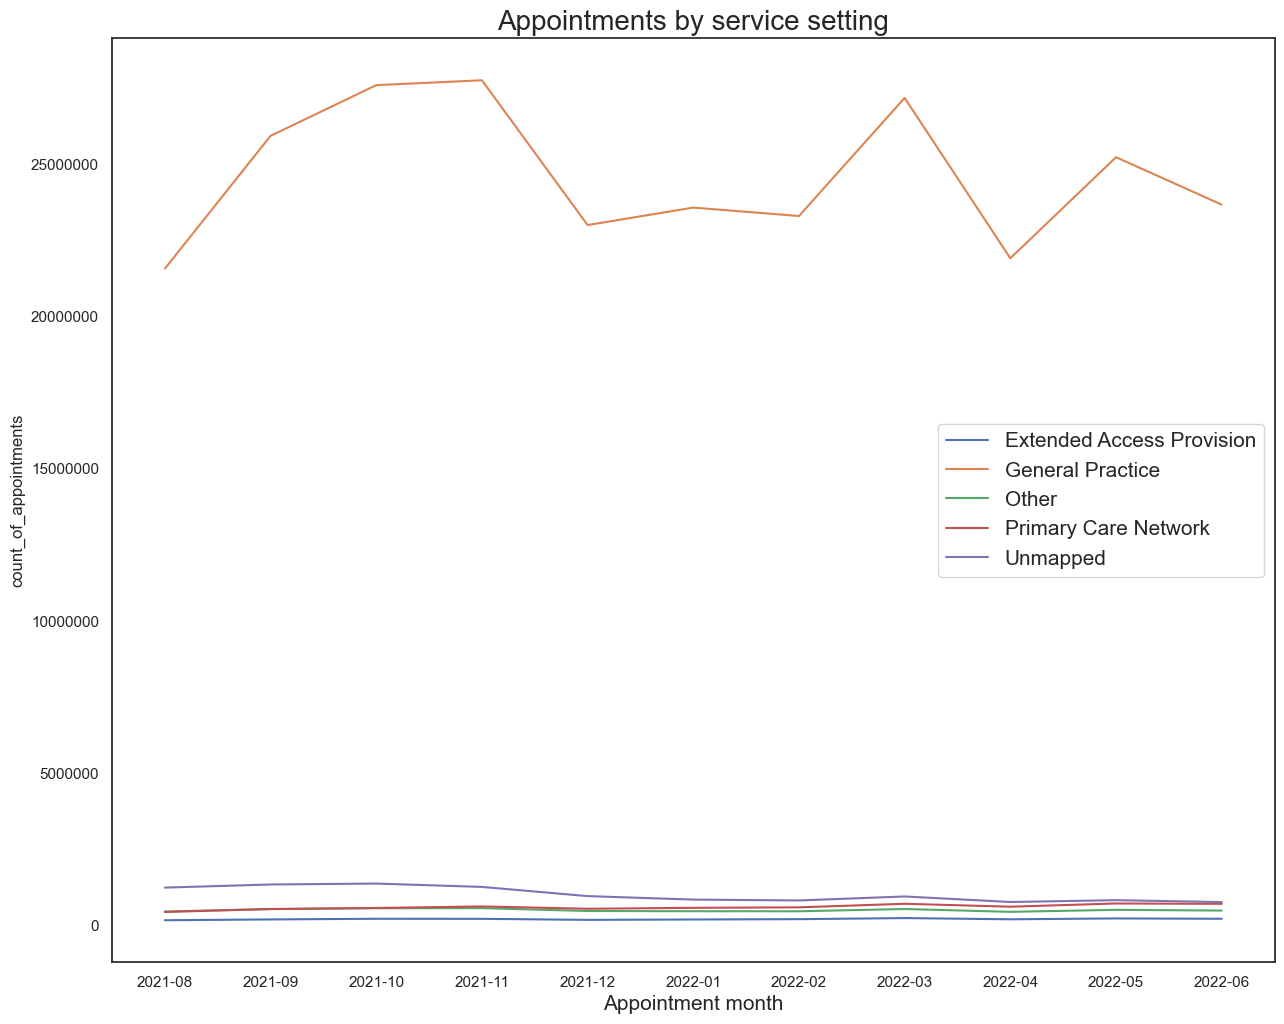

In [200]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
nc_ss_plot = sns.lineplot(x="appointment_month",
                          y="count_of_appointments",
                          data=nc_rpm,
                          hue='service_setting',
                          ci=None,)

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Appointment month', fontsize=15)
plt.title('Appointments by service setting', fontsize=20)
plt.legend(fontsize=15)
plt.savefig("appts by service setting.png")

Text(0.5, 0, 'Appointment month')

Text(0.5, 1.0, 'Appointments by service setting without GP')

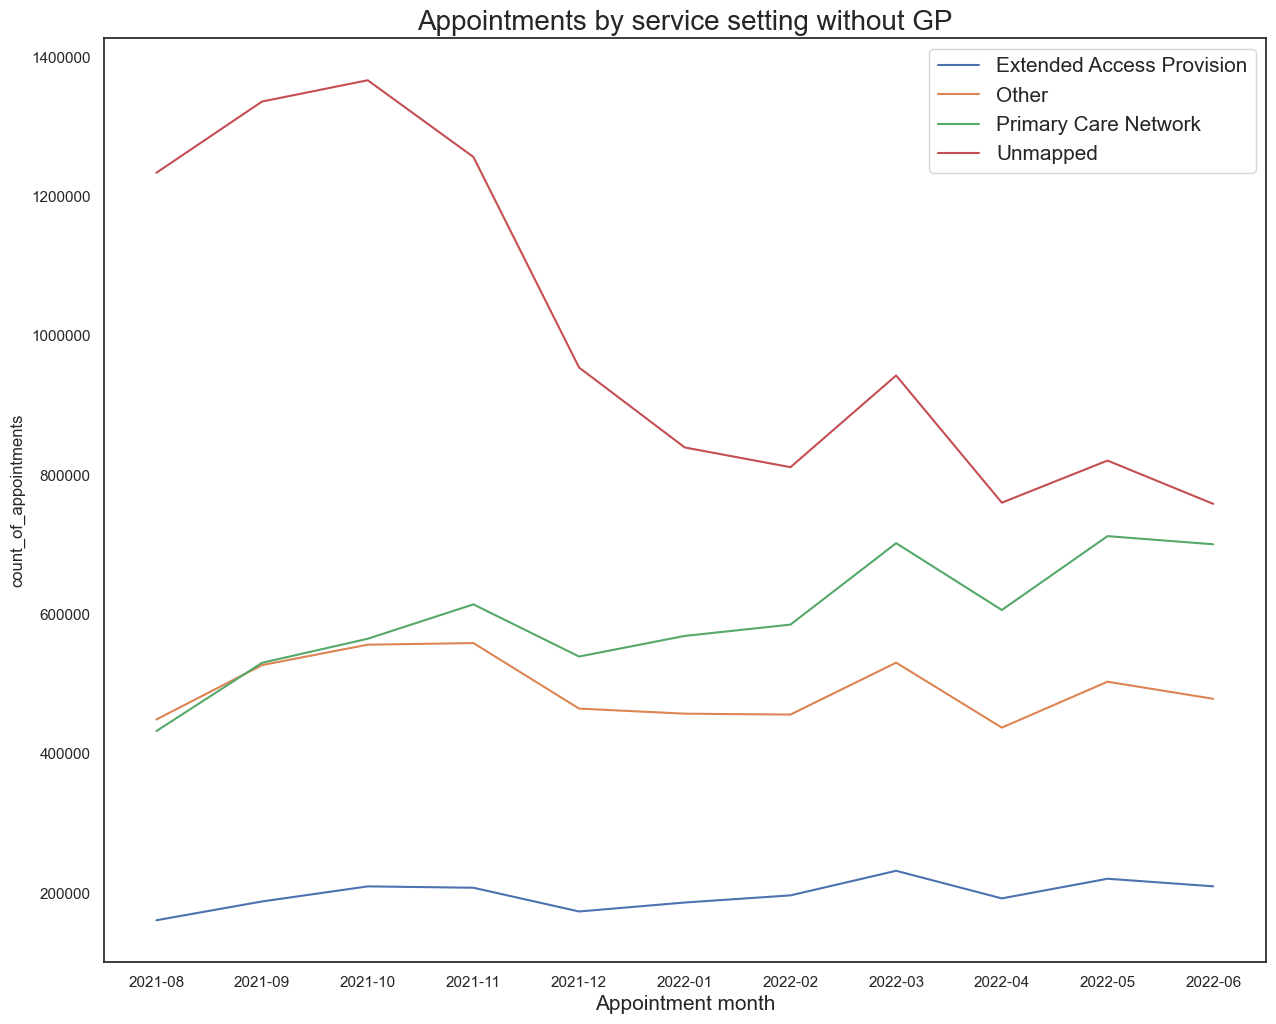

In [199]:
    #As we can see GP catagory is dominating all the chart...
    #and I will create another chart which will be without GP service with a new DF as 'nc_not_gp' to zoom in with '!= General Practice'.
    
nc_not_gp = nc_rpm[nc_rpm['service_setting'] != 'General Practice']

#nc_ss_not_gp
nc_not_gp_plot = sns.lineplot(x="appointment_month",
                                 y="count_of_appointments",
                                 data=nc_not_gp,
                                 hue='service_setting',
                                 ci=None)

# plot formatting
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Appointment month', fontsize=15)
plt.title('Appointments by service setting without GP', fontsize=20)
plt.legend(fontsize=15)

**Context types:**

In [214]:
# Create a separate data set that can be used in future weeks. 
    # new dataframe created and appended to nc_ctx dataset.
    # empty rows added to the subset that can be completed in future weeks.

nc_ctx = nc.groupby(['appointment_month', 'context_type']).sum().reset_index()

nc_ctx_addrows = {'appointment_month': ['2022-07', '2022-07', '2022-07',
                                       '2022-08', '2022-08', '2022-08'],
                 'context_type': ['Care Related Encounter', 'Inconsistent Mapping', 'Unmapped',
                                  'Care Related Encounter', 'Inconsistent Mapping', 'Unmapped'],
                 'count_of_appointments': [0, 0, 0, 0, 0, 0]}




In [216]:
nc_ctx_addrows

{'appointment_month': ['2022-07',
  '2022-07',
  '2022-07',
  '2022-08',
  '2022-08',
  '2022-08'],
 'context_type': ['Care Related Encounter',
  'Inconsistent Mapping',
  'Unmapped',
  'Care Related Encounter',
  'Inconsistent Mapping',
  'Unmapped'],
 'count_of_appointments': [0, 0, 0, 0, 0, 0]}

In [228]:
# converting to a dataframe

nc_ctx_addrows_df = pd.DataFrame(nc_ctx_addrows)

nc_ctx_morerows = nc_ctx.append(nc_ct_addrows_df, ignore_index=True)


NameError: name 'nc_ct_addrows_df' is not defined

In [229]:
nc_ctx_addrows_df

appointment_month            context_type  count_of_appointments
0           2022-07  Care Related Encounter                      0
1           2022-07    Inconsistent Mapping                      0
2           2022-07                Unmapped                      0
3           2022-08  Care Related Encounter                      0
4           2022-08    Inconsistent Mapping                      0
5           2022-08                Unmapped                      0

Text(0.5, 1.0, 'Context Types For Month')

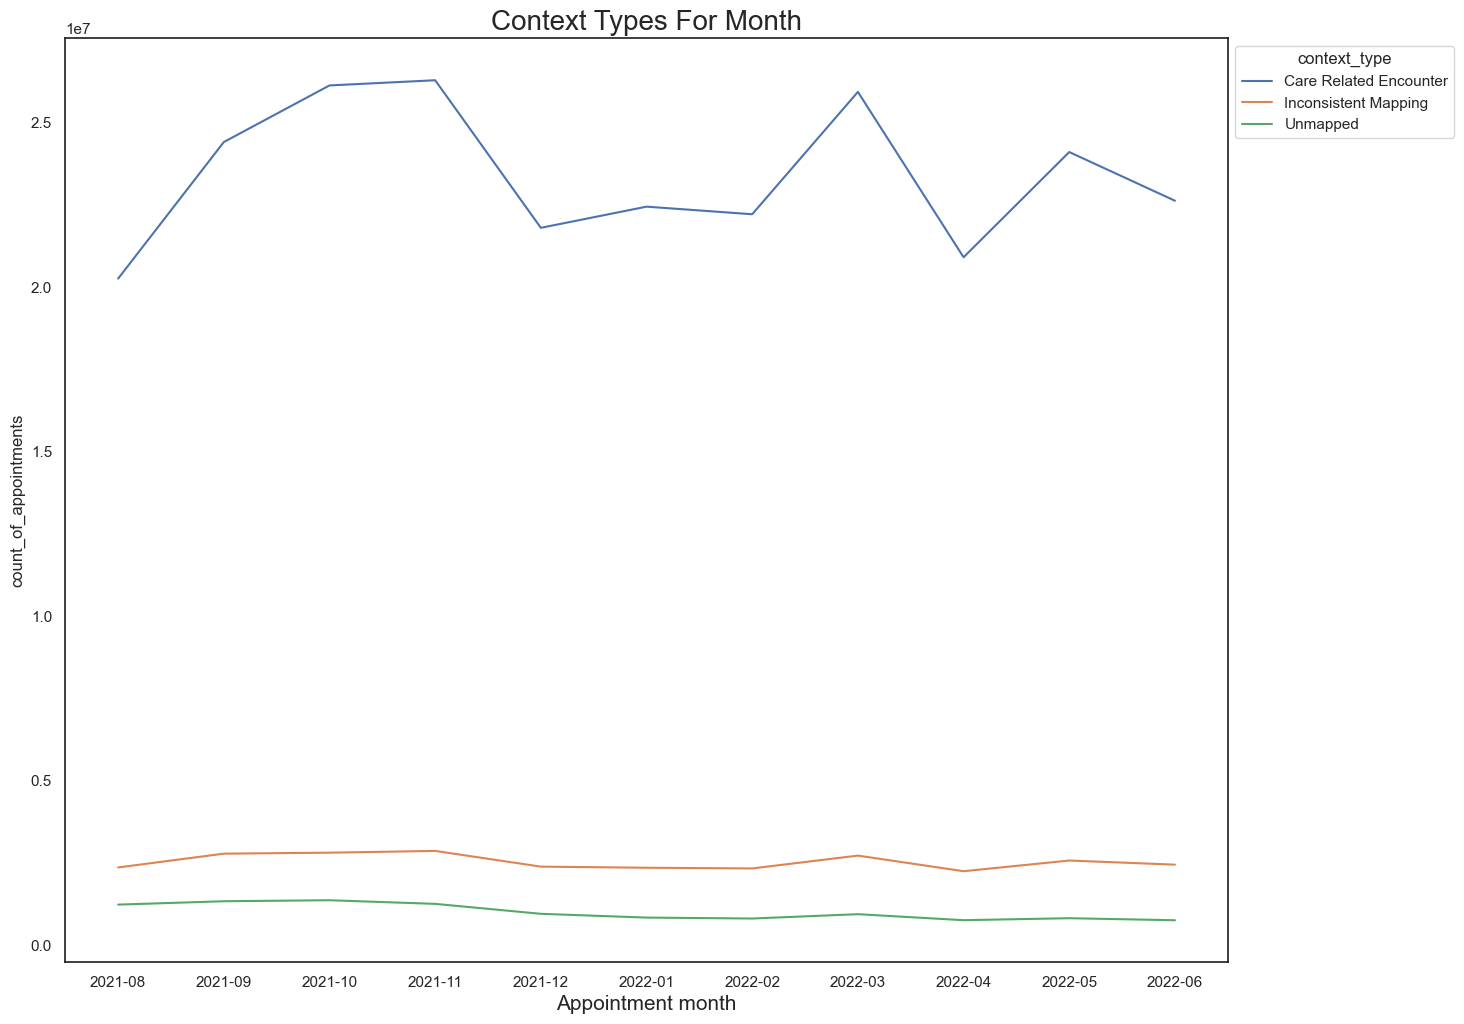

In [65]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
nc_ctx_plot = sns.lineplot(x="appointment_month",
                          y="count_of_appointments",
                          data=nc_ctx,
                          hue='context_type',
                          ci=None)

sns.move_legend(nc_ctx_plot, 'upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Appointment month', fontsize=15)
plt.title('Context Types For Month', fontsize=20)
    

**National categories:**

In [66]:
# Create a separate data set that can be used in future weeks. 
    #New df named as nc_nc & nc_nc_addrows
nc_nc = nc.groupby(
    ['appointment_month', 'national_category']).sum().reset_index()

nc_nc_addrows = {'appointment_month': ['2022-07', '2022-07', '2022-07', '2022-07', '2022-07',
                                       '2022-07', '2022-07', '2022-07', '2022-07', '2022-07',
                                       '2022-07', '2022-07', '2022-07', '2022-07', '2022-07',
                                       '2022-07', '2022-07', '2022-07', '2022-08', '2022-08',
                                       '2022-08', '2022-08', '2022-08', '2022-08', '2022-08',
                                       '2022-08', '2022-08', '2022-08', '2022-08', '2022-08',
                                       '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08'],
                 'national_category': ['Care Home Needs Assessment & Personalised Care and Support Planning',
                                       'Care Home Visit', 'Clinical Triage', 'General Consultation Acute',
                                       'General Consultation Routine', 'Group Consultation and Group Education',
                                       'Home Visit', 'Inconsistent Mapping', 'Non-contractual chargeable work',
                                       'Patient contact during Care Home Round', 'Planned Clinical Procedure',
                                       'Planned Clinics', 'Service provided by organisation external to the practice',
                                       'Social Prescribing Service', 'Structured Medication Review', 'Unmapped',
                                       'Unplanned Clinical Activity', 'Walk-in',
                                       'Care Home Needs Assessment & Personalised Care and Support Planning',
                                       'Care Home Visit', 'Clinical Triage', 'General Consultation Acute',
                                       'General Consultation Routine', 'Group Consultation and Group Education',
                                       'Home Visit', 'Inconsistent Mapping', 'Non-contractual chargeable work',
                                       'Patient contact during Care Home Round', 'Planned Clinical Procedure',
                                       'Planned Clinics', 'Service provided by organisation external to the practice',
                                       'Social Prescribing Service', 'Structured Medication Review', 'Unmapped',
                                       'Unplanned Clinical Activity', 'Walk-in'],
                 'count_of_appointments': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
nc_nc_addrows_df = pd.DataFrame(nc_nc_addrows)
nc_nc_morerowspls = nc_nc.append(nc_nc_addrows_df, ignore_index=True)

# View output.
nc_nc_morerowspls

appointment_month                                  national_category  \
0             2021-08  Care Home Needs Assessment & Personalised Care...   
1             2021-08                                    Care Home Visit   
2             2021-08                                    Clinical Triage   
3             2021-08                         General Consultation Acute   
4             2021-08                       General Consultation Routine   
..                ...                                                ...   
229           2022-08                         Social Prescribing Service   
230           2022-08                       Structured Medication Review   
231           2022-08                                           Unmapped   
232           2022-08                        Unplanned Clinical Activity   
233           2022-08                                            Walk-in   

     count_of_appointments  
0                    29676  
1                    47583  
2                  3704207  
3                  4280920  
4                  7756045  
..                     ...  
229                      0  
230                      0  
231                      0  
232                      0  
233                      0  

[234 rows x 3 columns]

Text(0.5, 1.0, 'National Categories')

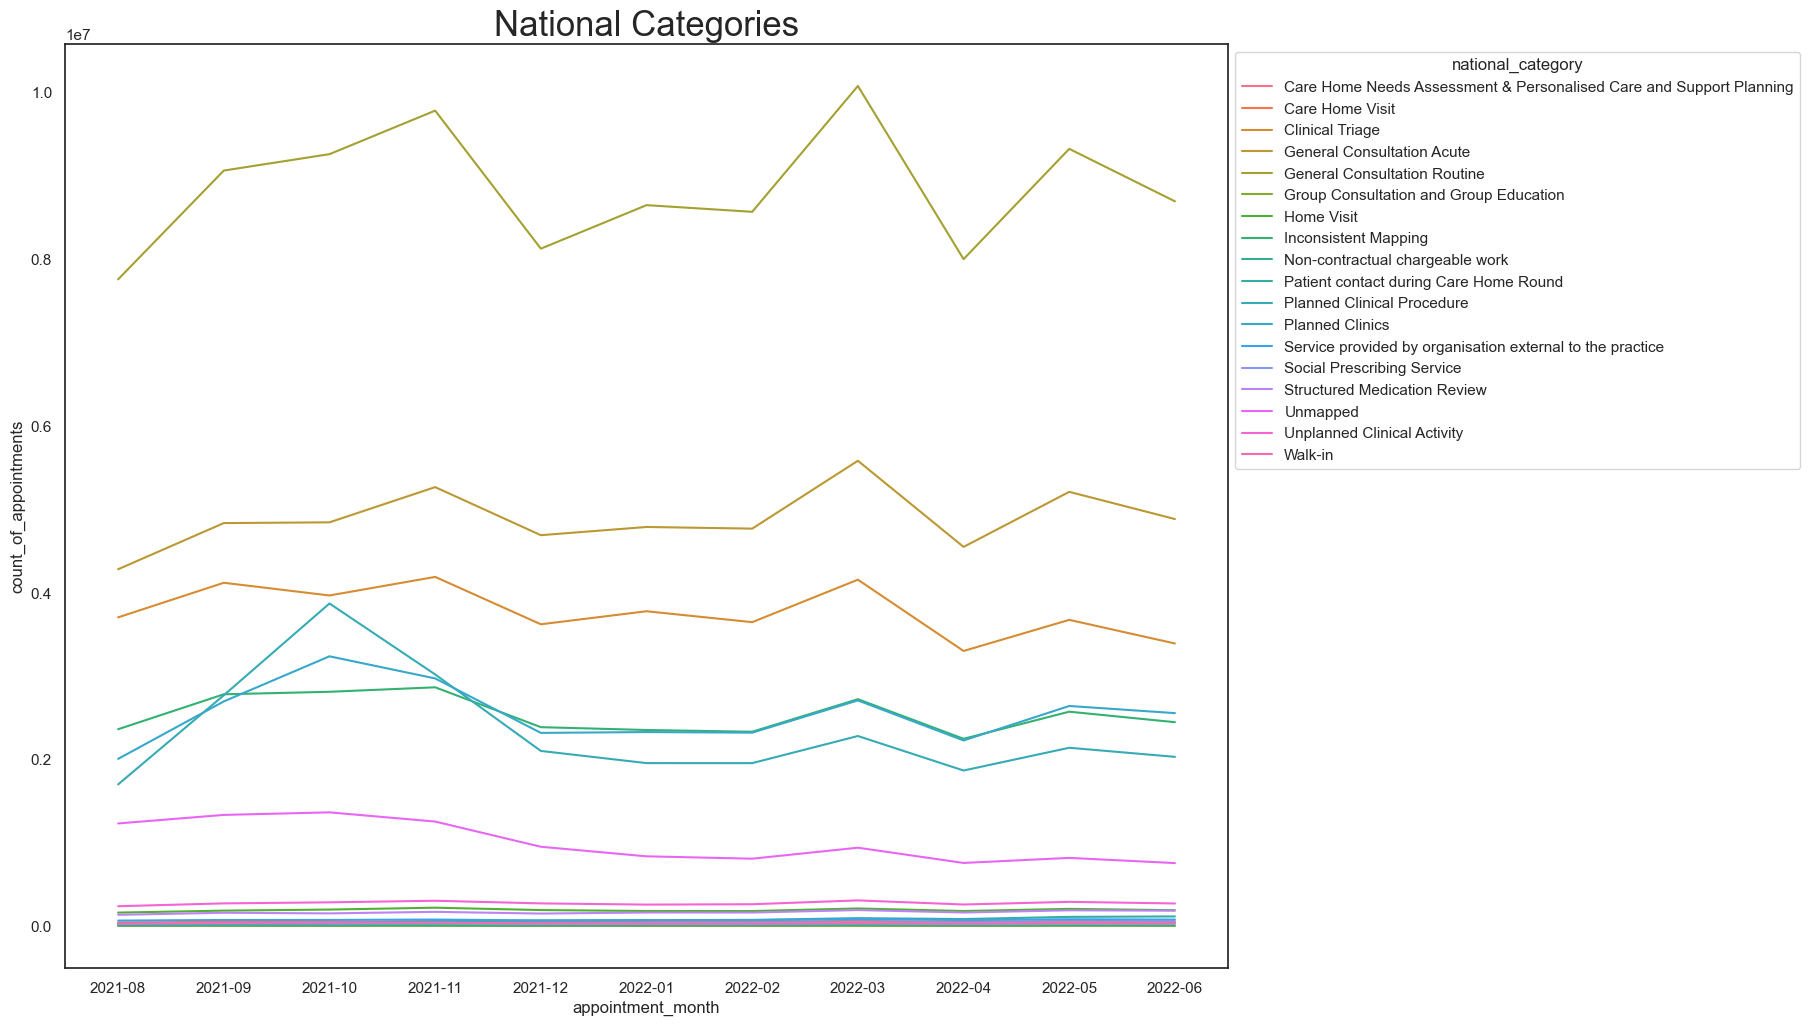

In [67]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
nc_nc_plot = sns.lineplot(x="appointment_month",
                          y="count_of_appointments",
                          data=nc_nc,
                          hue='national_category',
                          ci=None)
sns.move_legend(nc_nc_plot, 'upper left', bbox_to_anchor=(1, 1))
plt.title('National Categories', fontsize=25)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [68]:
# Create a separate data set that can be used in future weeks. 

nc_seas = nc.groupby(
    ['appointment_date', 'appointment_month', 'service_setting']).sum().reset_index()

# View output.
nc_seas.head(10)


appointment_date appointment_month            service_setting  \
0       2021-08-01           2021-08  Extended Access Provision   
1       2021-08-01           2021-08           General Practice   
2       2021-08-01           2021-08                      Other   
3       2021-08-01           2021-08       Primary Care Network   
4       2021-08-01           2021-08                   Unmapped   
5       2021-08-02           2021-08  Extended Access Provision   
6       2021-08-02           2021-08           General Practice   
7       2021-08-02           2021-08                      Other   
8       2021-08-02           2021-08       Primary Care Network   
9       2021-08-02           2021-08                   Unmapped   

   count_of_appointments  
0                    438  
1                   3411  
2                    401  
3                    323  
4                   1054  
5                   7705  
6                1108073  
7                  22098  
8                  20016  
9                  64876

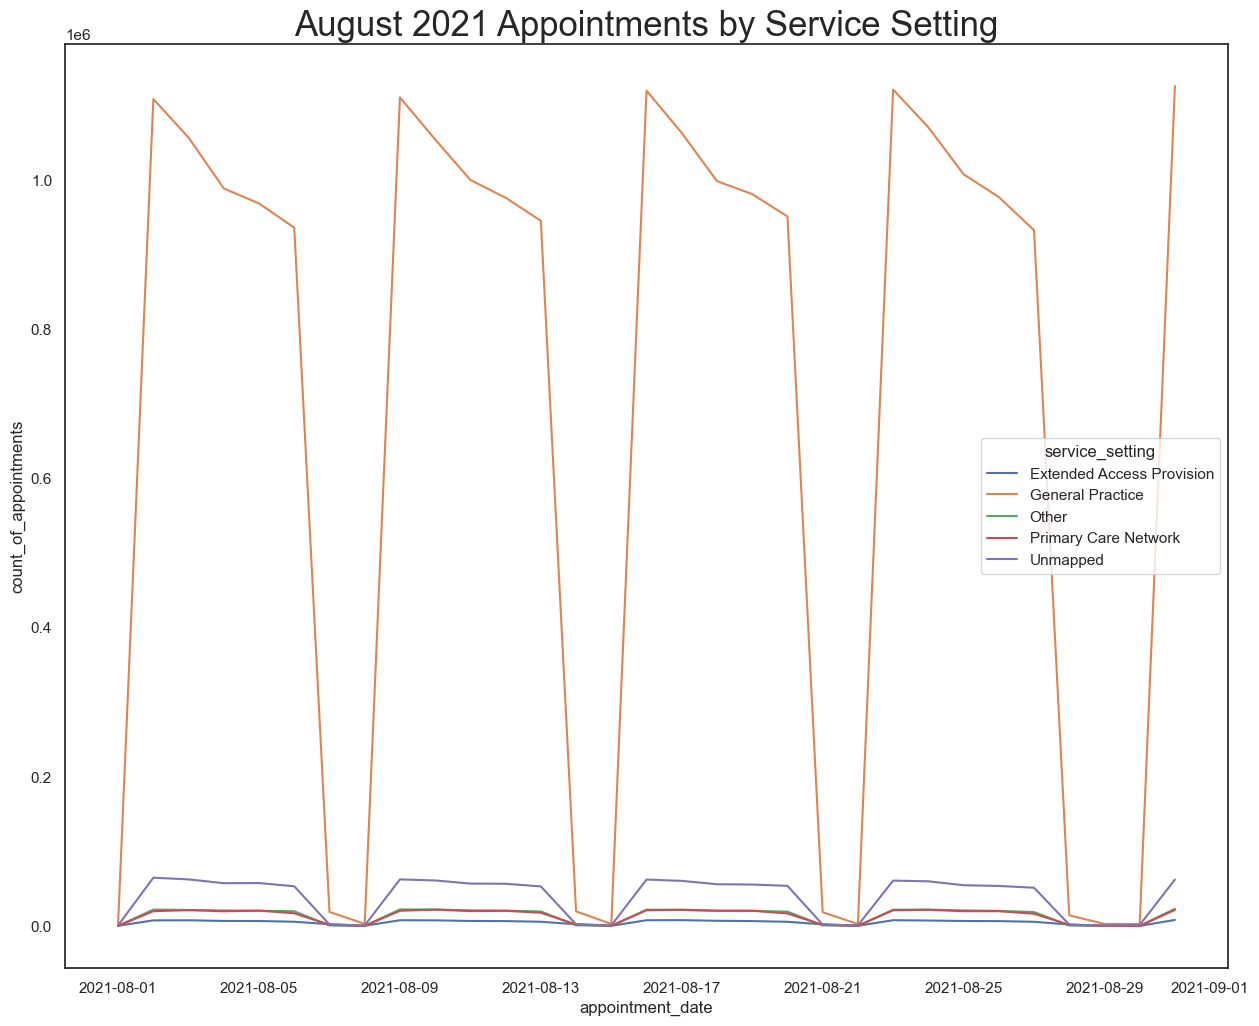

In [69]:
# Look at August 2021 in more detail to allow a closer look.
summer = nc_seas[nc_seas['appointment_month'] == '2021-08']
summer['appointment_date'] = pd.to_datetime(summer['appointment_date'])
# Create a lineplot.
ax_summer = sns.lineplot(x="appointment_date",
                         y="count_of_appointments",
                         data=summer,
                         hue='service_setting',
                         ci=None)
ax_summer.axes.set_title(
    "August 2021 Appointments by Service Setting", fontsize=25)
plt.savefig("ax_autumn.png")

**Autumn (October 2021):**

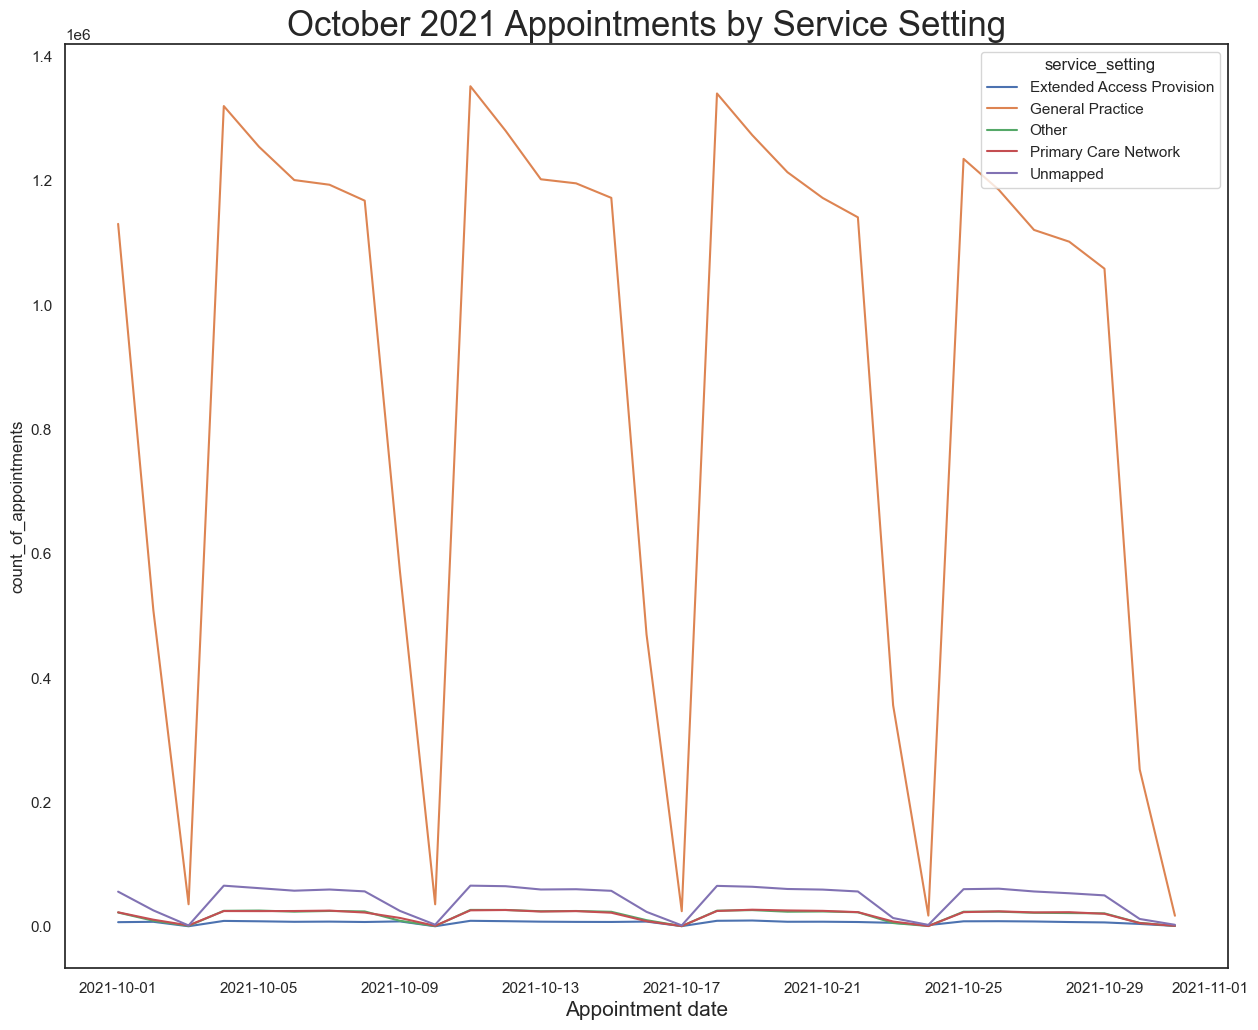

In [70]:
# Look at October 2021 in more detail to allow a closer look.
autumn = nc_seas[nc_seas['appointment_month'] == '2021-10']
autumn['appointment_date'] = pd.to_datetime(autumn['appointment_date'])

# Create a lineplot.
ax_autumn = sns.lineplot(x="appointment_date",
                         y="count_of_appointments",
                         data=autumn,
                         hue='service_setting',
                         ci=None)
ax_autumn.axes.set_title(
    "October 2021 Appointments by Service Setting", fontsize=25)
ax_autumn.set_xlabel("Appointment date", fontsize=15)
plt.savefig("ax_autumn.png")

**Winter (January 2022):**

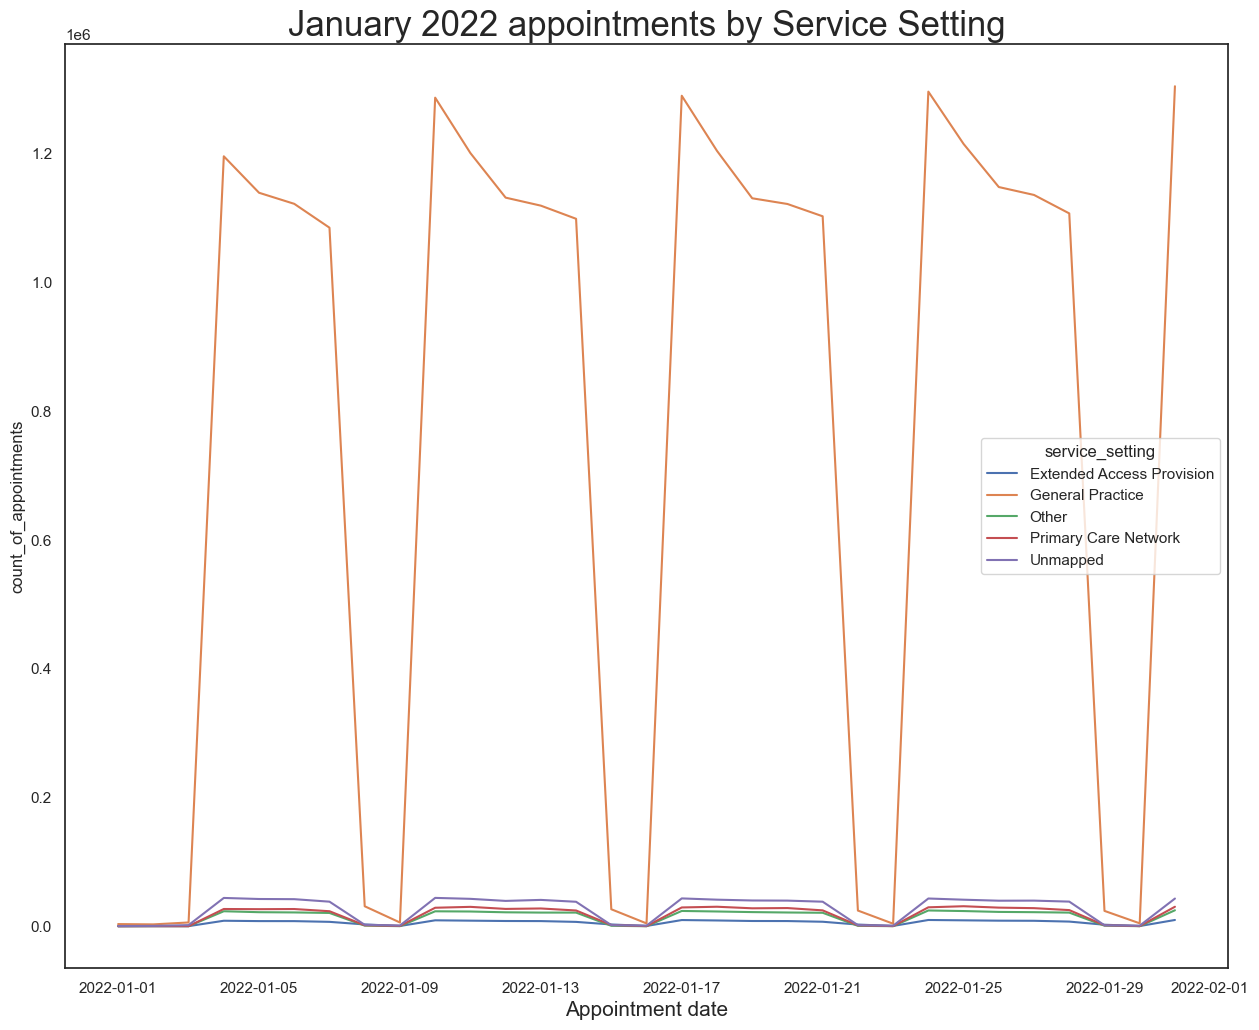

In [71]:
# Look at January 2022 in more detail to allow a closer look.
winter = nc_seas[nc_seas['appointment_month'] == '2022-01']
winter['appointment_date'] = pd.to_datetime(winter['appointment_date'])
# Create a lineplot.
ax_winter = sns.lineplot(x="appointment_date",
                         y="count_of_appointments",
                         data=winter,
                         hue='service_setting',
                         ci=None)
ax_winter.axes.set_title(
    "January 2022 appointments by Service Setting", fontsize=25)
ax_winter.set_xlabel("Appointment date", fontsize=15)
plt.savefig("ax_winter.png")

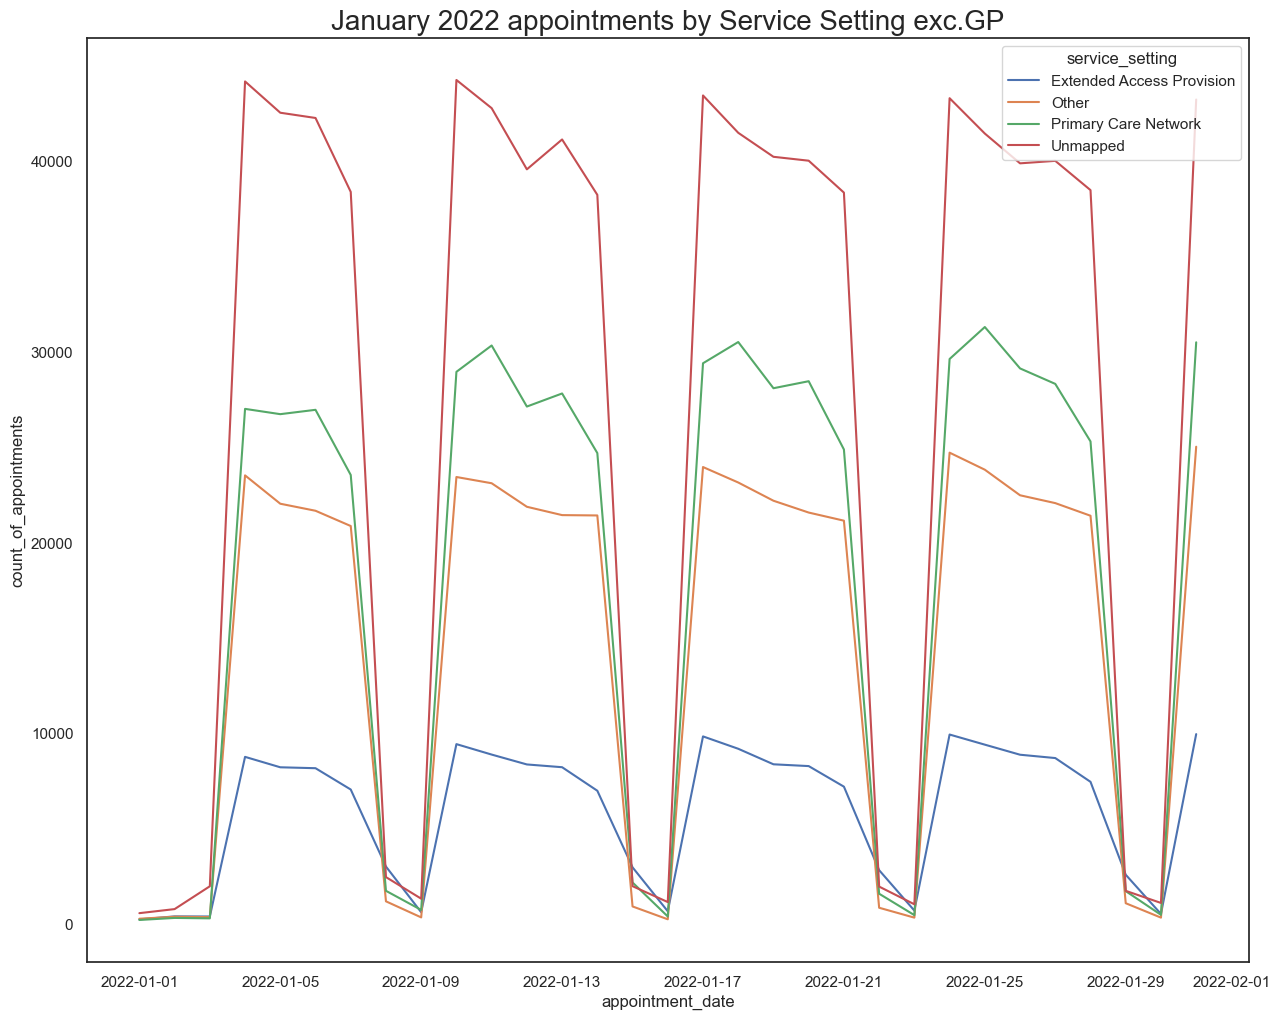

In [72]:
    # as we aware GP appointments are dominating all chart and for experiental reasons I have removed the GP from the chart.


Try1 = nc_seas[nc_seas['service_setting'] != 'General Practice']
winter = Try1[Try1['appointment_month'] == '2022-01']


ax_winter2 = sns.lineplot(x="appointment_date",
                         y="count_of_appointments",
                         data=winter,
                         hue='service_setting',
                         ci=None)
ax_winter2.axes.set_title(
    "January 2022 appointments by Service Setting exc.GP", fontsize=20)
plt.savefig("ax_wintertry1.png")

**Spring (April 2022):**

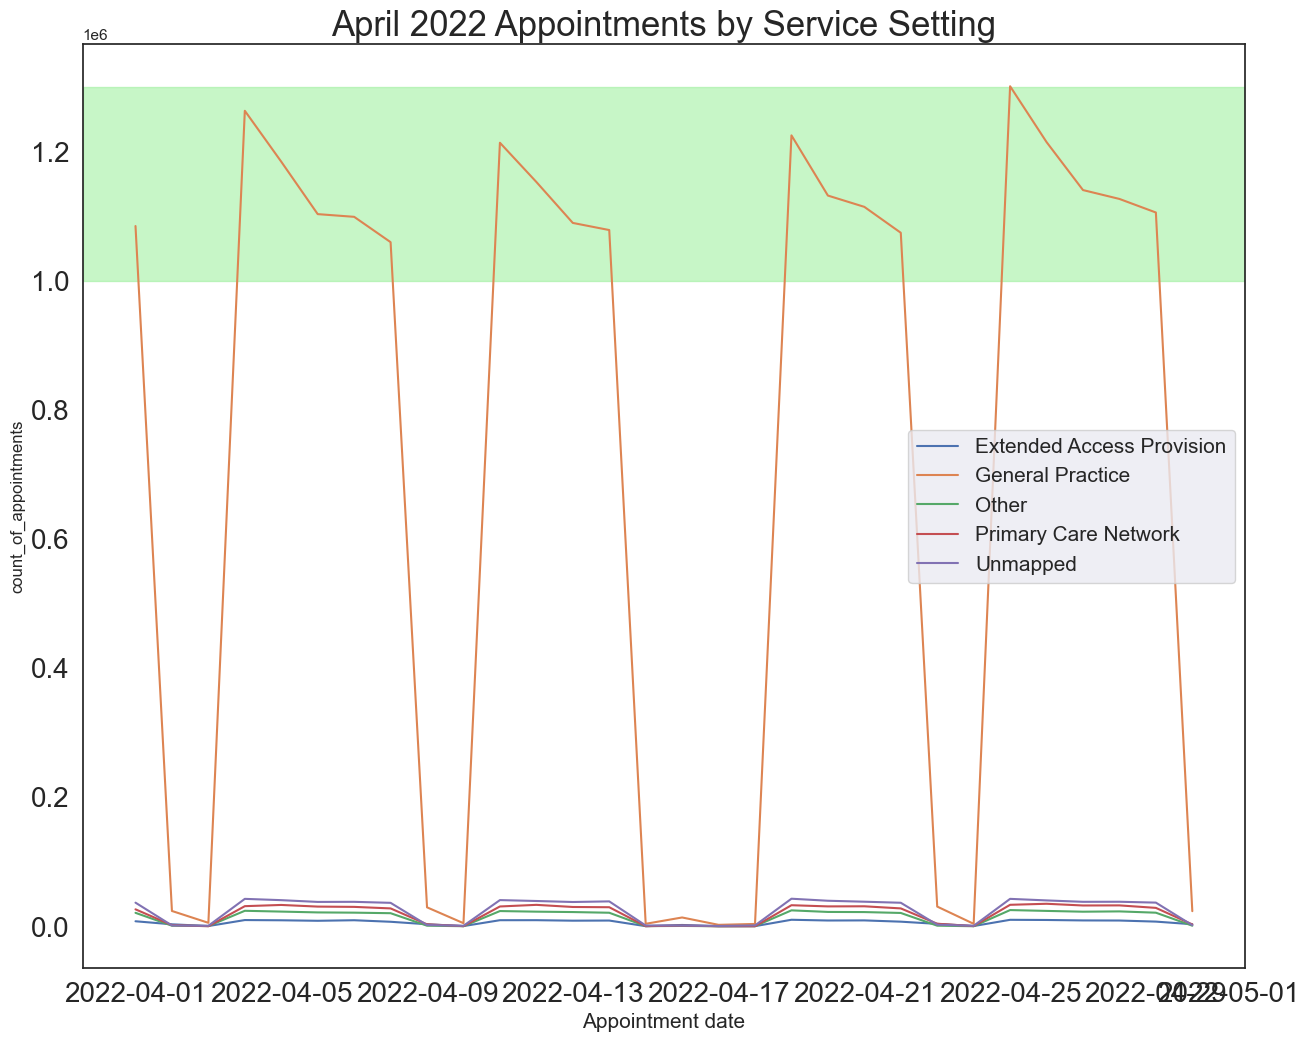

In [73]:
#Look at April 2022 in more detail to allow a closer look.
spring = nc_seas[nc_seas['appointment_month'] == '2022-04']
spring['appointment_date'] = pd.to_datetime(spring['appointment_date'])

# Create a lineplot.
ax_spring = sns.lineplot(x="appointment_date",
                         y="count_of_appointments",
                         data=spring,
                         hue='service_setting',
                         ci=None)

# plot adjustments
sns.set(rc={'figure.figsize': (20, 10)})
ax_spring.axes.set_title(
    "April 2022 Appointments by Service Setting", fontsize=25)
ax_spring.set_xlabel("Appointment date", fontsize=15)
ax_spring.tick_params(labelsize=20)
plt.legend(fontsize=15, loc=5)

# highlighting area
plt.axhspan(1000000, 1300000, color='lightgreen', alpha=0.5)
plt.savefig("ax_spring.png")


Text(0.5, 29.0, 'Appointment date')

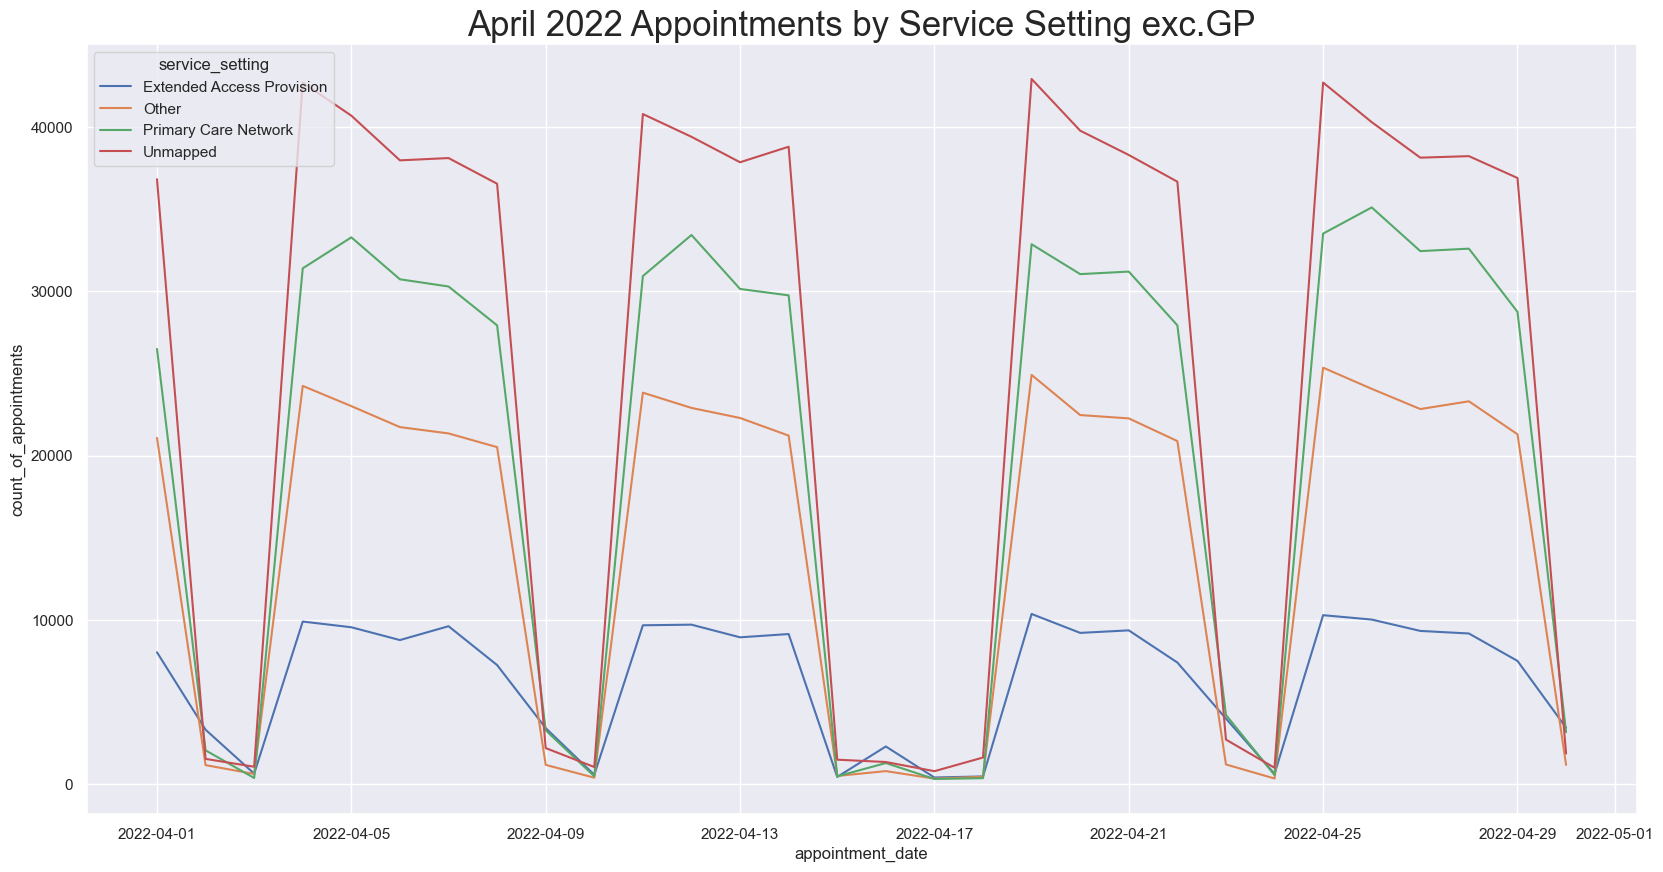

In [74]:
    # Removing the GP from the chart
    
Try2 = nc_seas[nc_seas['service_setting'] != 'General Practice']
spring2 = Try2[Try2['appointment_month'] == '2022-04']
spring2['appointment_date'] = pd.to_datetime(spring2['appointment_date'])
# Create a lineplot.
ax_spring2 = sns.lineplot(x="appointment_date",
                         y="count_of_appointments",
                         data=spring2,
                         hue='service_setting',
                         ci=None)
ax_spring2.axes.set_title(
    "April 2022 Appointments by Service Setting exc.GP", fontsize=25)
ax_spring.set_xlabel("Appointment date", fontsize=15)

# 

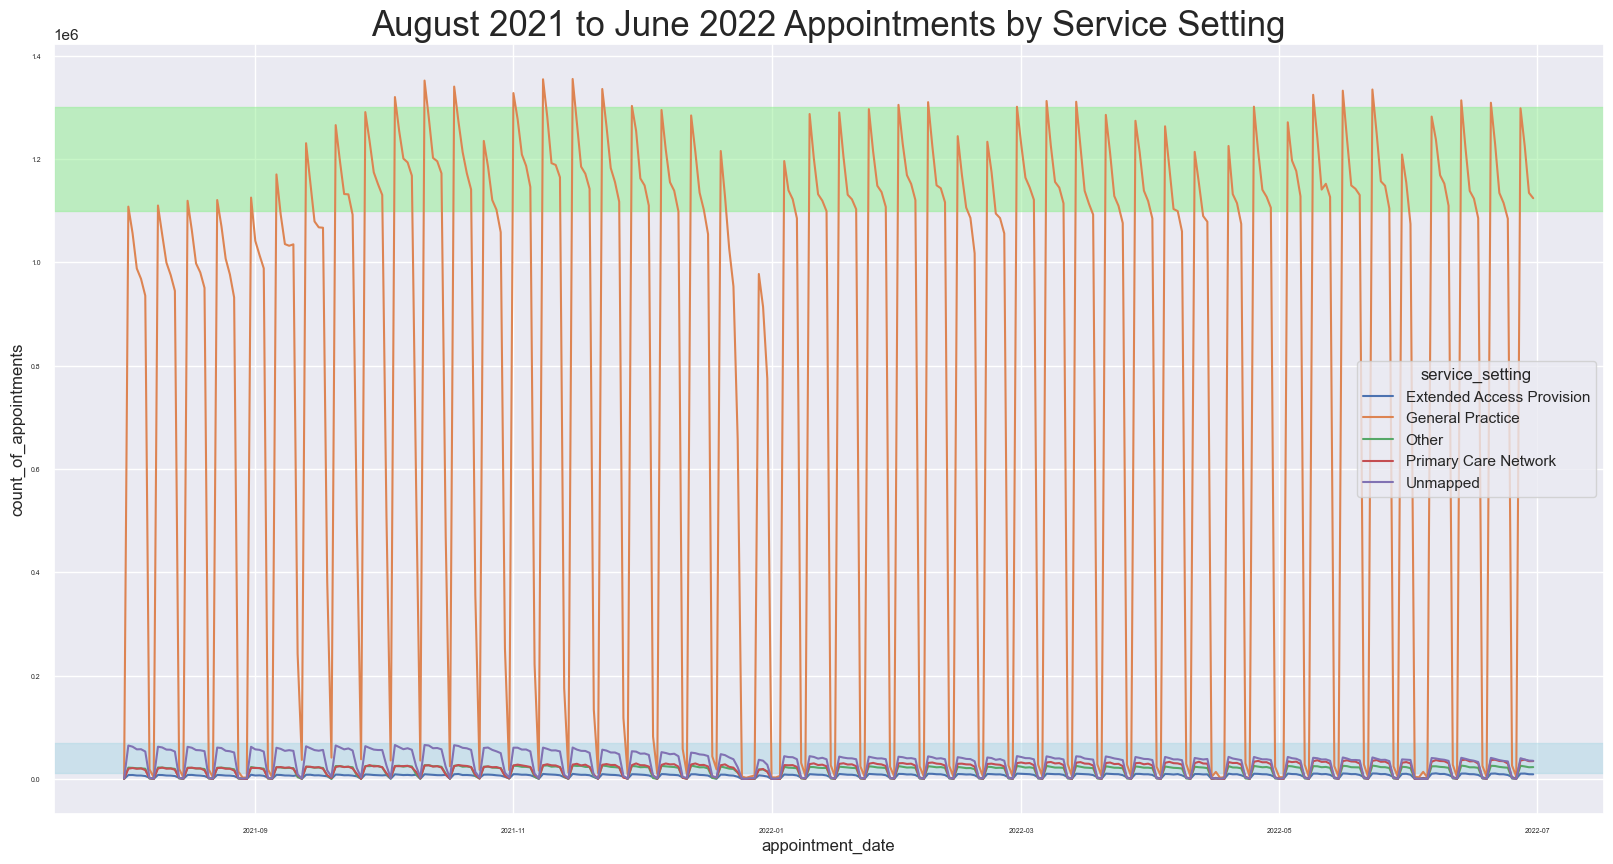

In [75]:
    # Overviev for August 2021 to June 2022 Data 'nc_seas'
    
ax_augtojunview = sns.lineplot(x="appointment_date",
                           y="count_of_appointments",
                           data=nc_seas,
                           hue='service_setting',
                           ci=None)

# plot formatting

ax_augtojunview.axes.set_title(
    "August 2021 to June 2022 Appointments by Service Setting", fontsize=25)
ax_augtojunview.tick_params(labelsize=5)

# highlighting top Gp and other services area
plt.axhspan(1100000, 1300000, color='lightgreen', alpha=0.5)
plt.axhspan(11000, 70000, color='lightblue', alpha=0.5)
plt.savefig("ax_spring.png")

plt.savefig("ax_augtojun.png")

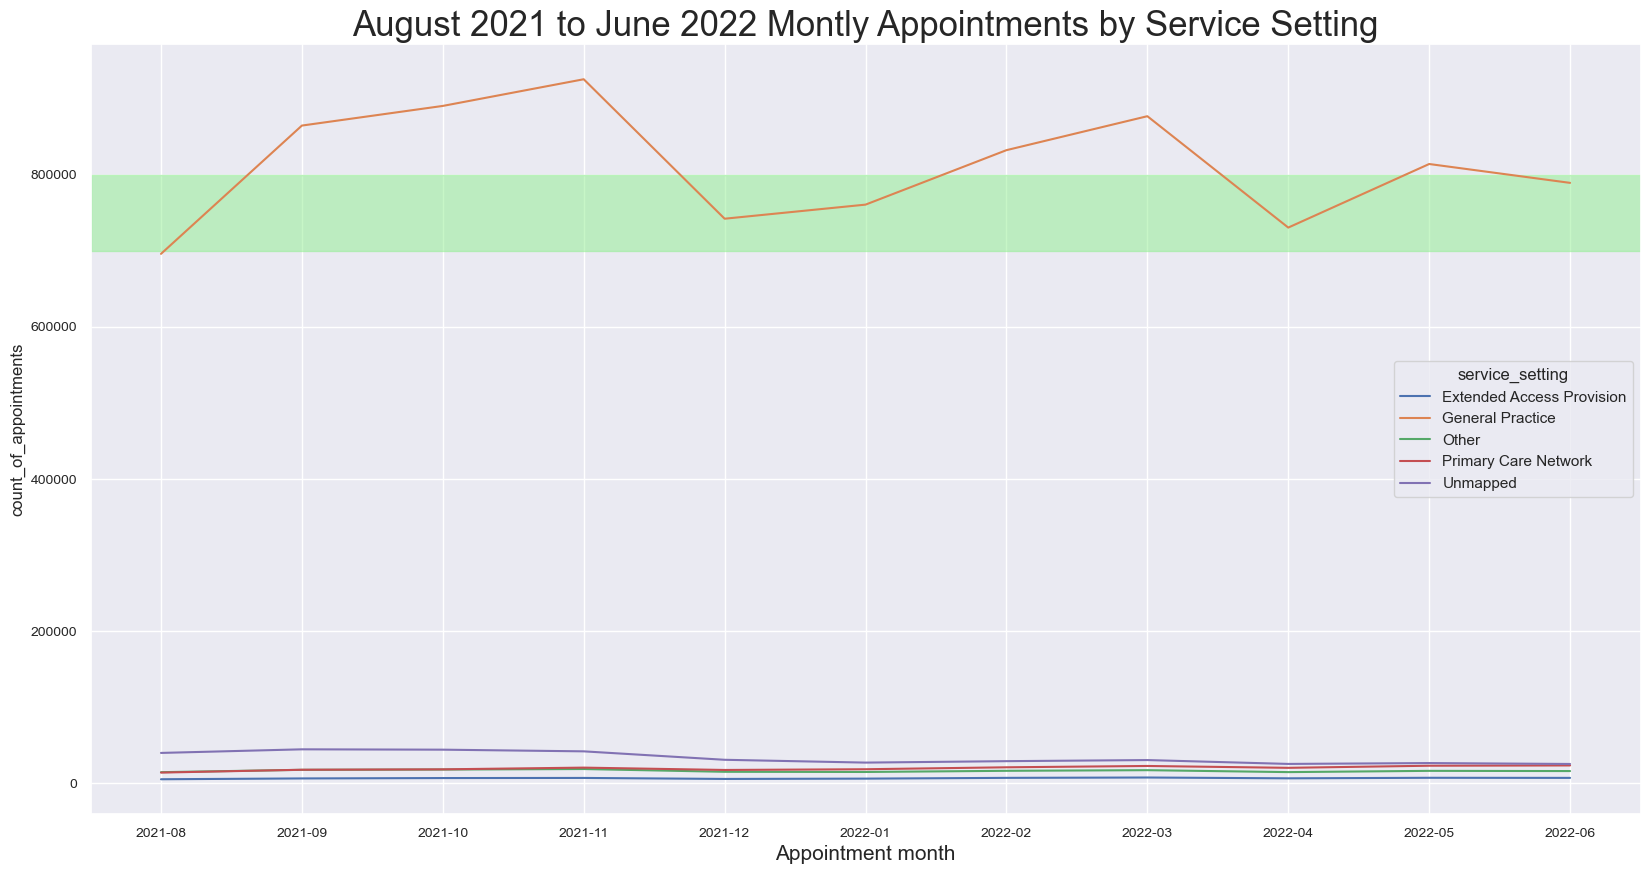

In [76]:
#August 2021 to June 2022 Montly appointments by service setting
ax_augtojun_month = sns.lineplot(x="appointment_month",
                                 y="count_of_appointments",
                                 data=nc_seas,
                                 hue='service_setting',
                                 ci=None)

# plot formatting

ax_augtojun_month.axes.set_title(
    "August 2021 to June 2022 Montly Appointments by Service Setting", fontsize=25)

ax_augtojun_month.set_xlabel("Appointment month", fontsize=15)

ax_augtojun_month.tick_params(labelsize=10)
#Highlighting trend area for Gp service settings
plt.axhspan(700000, 800000, color='lightgreen', alpha=0.5)
plt.savefig("ax_augtojun_month.png")

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [77]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [78]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [79]:
# Explore the metadata.
tweets.describe()
tweets.info()
tweets.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


(1174, 10)

In [80]:
    # Determine whether there are missing values.
tweets.isnull().values.any()

True

In [81]:
#missing values 167/1174
tw_na = tweets[tweets.isna().any(axis=1)]
tw_na.shape

(167, 10)

In [82]:
# Explore the data set.

#Retweet Count:

retweet_count = tweets[['tweet_retweet_count']].value_counts().sort_index()

retweet_count

tweet_retweet_count
0                      526
1                      215
2                      114
3                       70
4                       27
5                       35
6                       12
7                       18
8                       15
9                       13
10                       5
11                       6
12                      16
13                       1
14                       1
15                       1
16                       2
19                       1
20                       1
23                       2
24                       2
35                      10
37                       6
39                       1
40                       1
41                       3
44                       4
48                       1
49                       1
53                       5
54                       1
57                       1
62                       3
63                       4
68                       3
72                       2
73      

In [83]:
#Fav count
favourite_count = tweets[['tweet_favorite_count']].value_counts().sort_index()

favourite_count

tweet_favorite_count
0                       1027
1                         91
2                         16
3                         13
4                          7
5                          5
6                          2
7                          1
8                          1
9                          1
10                         1
11                         1
12                         1
13                         1
14                         1
17                         1
18                         1
20                         1
28                         1
42                         1
dtype: int64

In [84]:
#tweet_lang?-According to the tweets.shape 1147 and English as a tweet lang is 1174.

tweet_lan = tweets[['tweet_lang']].value_counts().sort_index()
tweet_lan

tweet_lang
en            1174
dtype: int64

In [85]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.


In [86]:
# Create a new DataFrame containing only the text.

tweets_text = tweets['tweet_full_text']

# View the DataFrame.
print(tweets_text)


0       As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                   RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                                RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                                  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4       ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a gr

In [87]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [98]:
# create series
tags_series = pd.Series(tags)

tags_series_count = tags_series.value_counts()
tags_series_count

#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Length: 1754, dtype: int64

In [99]:
# Display the first 30 records.

tags_top30 = tags_series_count.iloc[0:30]

tags_top30

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [156]:
tags_top30

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [100]:
# Convert the series to a DataFrame in preparation for visualisation.

tags_data = pd.DataFrame(tags_series_count).reset_index()

# Rename the columns.

tags_data.rename(columns={tags_data.columns[0]: "hashtag",
                          tags_data.columns[1]: "count"}, inplace=True)
tags_data

hashtag  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]

In [101]:
# Fix the count datatype.
tags_data.dtypes
tags_data['count'].astype(int)

# View the result.
tags_data.info

<bound method DataFrame.info of             hashtag  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]>

In [104]:
# Display records where the count is larger than 10.
tags_data_10plus = tags_data[(tags_data['count'] > 10)]
tags_data_10plus

hashtag  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #wellness     15
25                  #healthtech     15
26  #doctorofveterinarymedicine     14
27                     #science     14
28                    #medicare     14
29                     #covid19     14
30                #telemedicine     13
31                 #healthcare.     13
32                        #tech     13
33                      #foamed     13
34                 #patientcare     13
35                   #education     13
36                      #doctor     12
37                #mentalhealth     12
38                   #hospitals     12
39                  #innovation     11
40                  #telehealth     11
41                 #healthcare?     11
42                #healthcareit     11
43                         #usa     11
44                      #nurses     11
45     drugs\n\n#tipsfornewdocs     11
46       #digitaltransformation     11

Text(0.5, 1.0, 'Counting >10 Hashtag records')

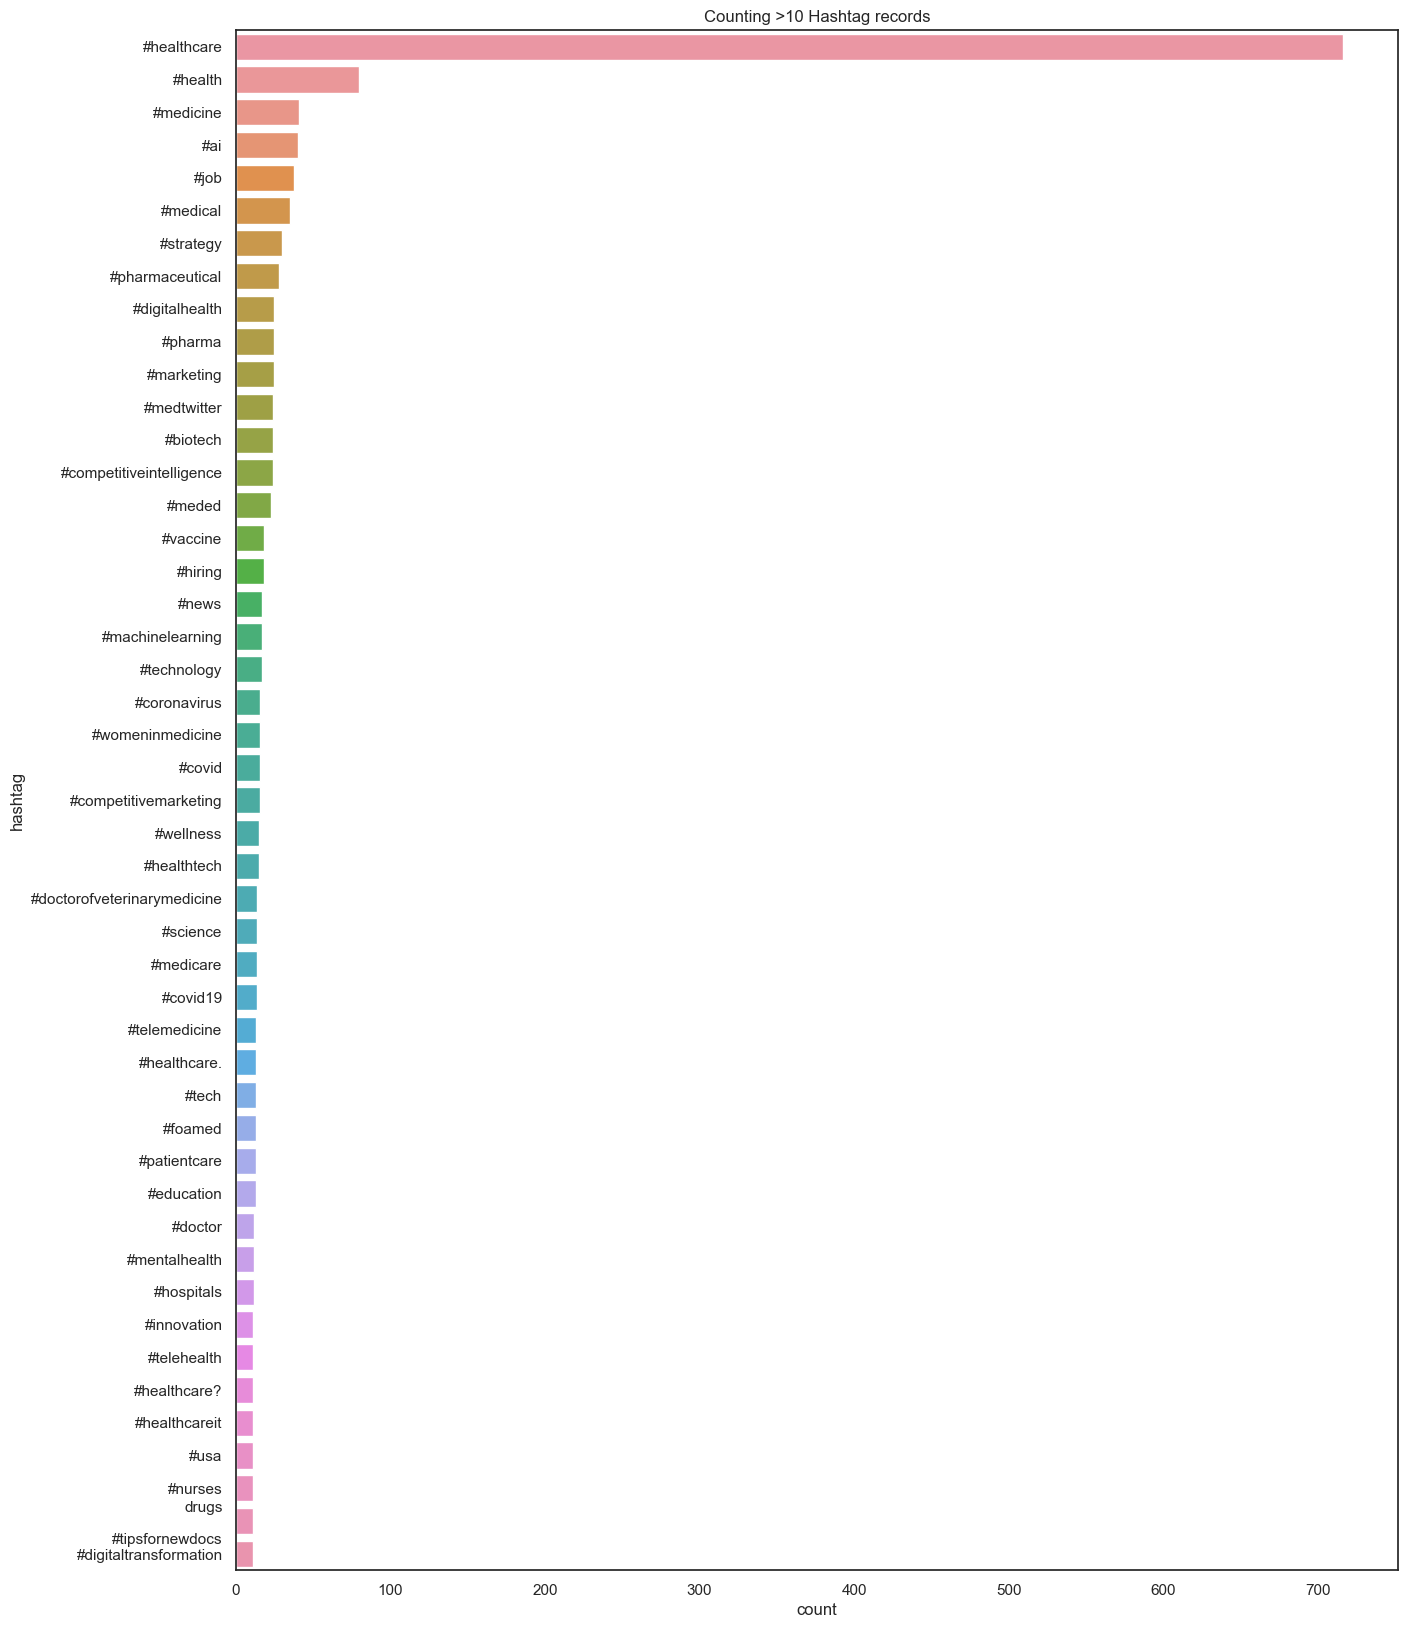

In [105]:
# Create a Seaborn barplot indicating records with a count >10 records.
f, ax3 = plt.subplots(figsize=(15, 20))
sns.set_style('white')
sns.barplot(x='count',
            y='hashtag',
            data=tags_data_10plus)
ax3.set_title('Counting >10 Hashtag records')

Text(0.5, 1.0, 'Popular hashtags  >10 Hashtag records exc."Healthcare"')

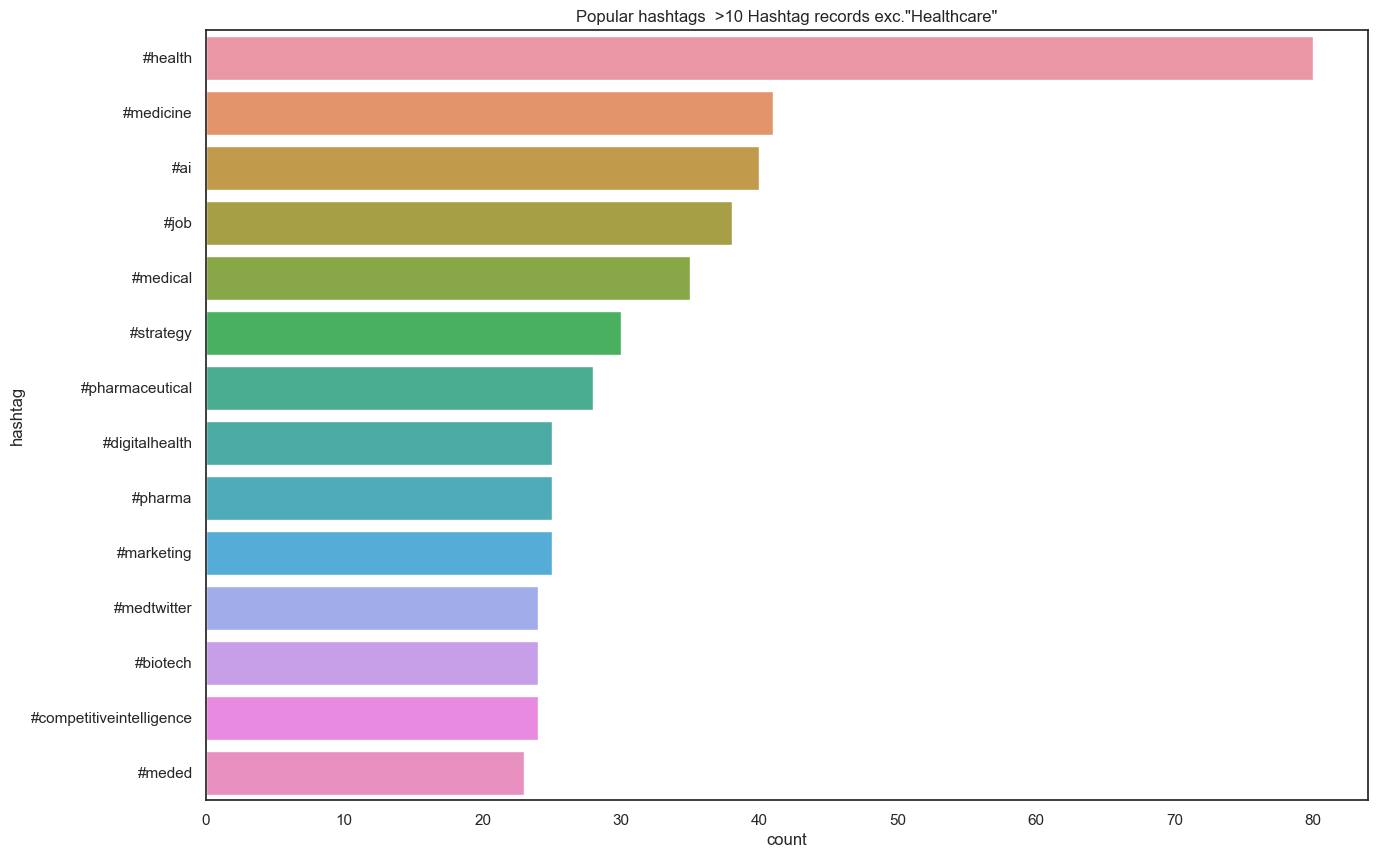

In [106]:
#removing healthcare from the list to zoom in.
tags_data_20to100 = tags_data[(
    tags_data['count'] > 20) & (tags_data['count'] < 100)]
f, ax4 = plt.subplots(figsize=(15, 10))
sns.barplot(x='count',
            y='hashtag',
            data=tags_data_20to100)
ax4.set_title('Popular hashtags  >10 Hashtag records exc."Healthcare"')

# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [144]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ar = pd.read_csv('appointments_regional.csv')


# View the DataFrame.
ar

icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000034           2020-01           Attended       GP   
1         E54000034           2020-01           Attended       GP   
2         E54000034           2020-01           Attended       GP   
3         E54000034           2020-01           Attended       GP   
4         E54000034           2020-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
0                        8107  
1                        6791  
2                       20686  
3                        4268  
4                       11971  
...                       ...  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10  

[596821 rows x 7 columns]

In [146]:
# Create an aggregated data set to review the different features.
ar_agg = ar.groupby([ar['appointment_month'], ar['hcp_type'], ar['appointment_status'], ar['appointment_mode'], 
        ar['time_between_book_and_appointment']])[['count_of_appointments']].agg(sum).reset_index()
ar_agg

appointment_month hcp_type appointment_status appointment_mode  \
0               2020-01       GP           Attended     Face-to-Face   
1               2020-01       GP           Attended     Face-to-Face   
2               2020-01       GP           Attended     Face-to-Face   
3               2020-01       GP           Attended     Face-to-Face   
4               2020-01       GP           Attended     Face-to-Face   
...                 ...      ...                ...              ...   
10134           2022-06  Unknown            Unknown          Unknown   
10135           2022-06  Unknown            Unknown          Unknown   
10136           2022-06  Unknown            Unknown          Unknown   
10137           2022-06  Unknown            Unknown          Unknown   
10138           2022-06  Unknown            Unknown     Video/Online   

      time_between_book_and_appointment  count_of_appointments  
0                                 1 Day                 653846  
1                        15  to 21 Days                 620789  
2                           2 to 7 Days                1723834  
3                        22  to 28 Days                 421189  
4                         8  to 14 Days                1123186  
...                                 ...                    ...  
10134                     8  to 14 Days                   5494  
10135                 More than 28 Days                   5115  
10136                          Same Day                   1914  
10137            Unknown / Data Quality                     53  
10138                       2 to 7 Days                      1  

[10139 rows x 6 columns]

In [147]:
# Determine the total number of appointments per month.
ar_df = ar.groupby([ar['appointment_month']])[['count_of_appointments']].agg(sum).reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = ar_df['count_of_appointments']/30
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# View the DataFrame.
ar_df.head()

appointment_month  count_of_appointments  utilisation
0           2020-01               27199296     906643.2
1           2020-02               24104621     803487.4
2           2020-03               24053468     801782.3
3           2020-04               16007881     533596.0
4           2020-05               16417212     547240.4

appointment_month hcp_type appointment_status appointment_mode  \
0               2020-01       GP           Attended     Face-to-Face   
1               2020-01       GP           Attended     Face-to-Face   
2               2020-01       GP           Attended     Face-to-Face   
3               2020-01       GP           Attended     Face-to-Face   
4               2020-01       GP           Attended     Face-to-Face   
...                 ...      ...                ...              ...   
10134           2022-06  Unknown            Unknown          Unknown   
10135           2022-06  Unknown            Unknown          Unknown   
10136           2022-06  Unknown            Unknown          Unknown   
10137           2022-06  Unknown            Unknown          Unknown   
10138           2022-06  Unknown            Unknown     Video/Online   

      time_between_book_and_appointment  count_of_appointments  
0                                 1 Day                 653846  
1                        15  to 21 Days                 620789  
2                           2 to 7 Days                1723834  
3                        22  to 28 Days                 421189  
4                         8  to 14 Days                1123186  
...                                 ...                    ...  
10134                     8  to 14 Days                   5494  
10135                 More than 28 Days                   5115  
10136                          Same Day                   1914  
10137            Unknown / Data Quality                     53  
10138                       2 to 7 Days                      1  

[10139 rows x 6 columns]

<Axes: xlabel='appointment_month', ylabel='count_of_appointments'>

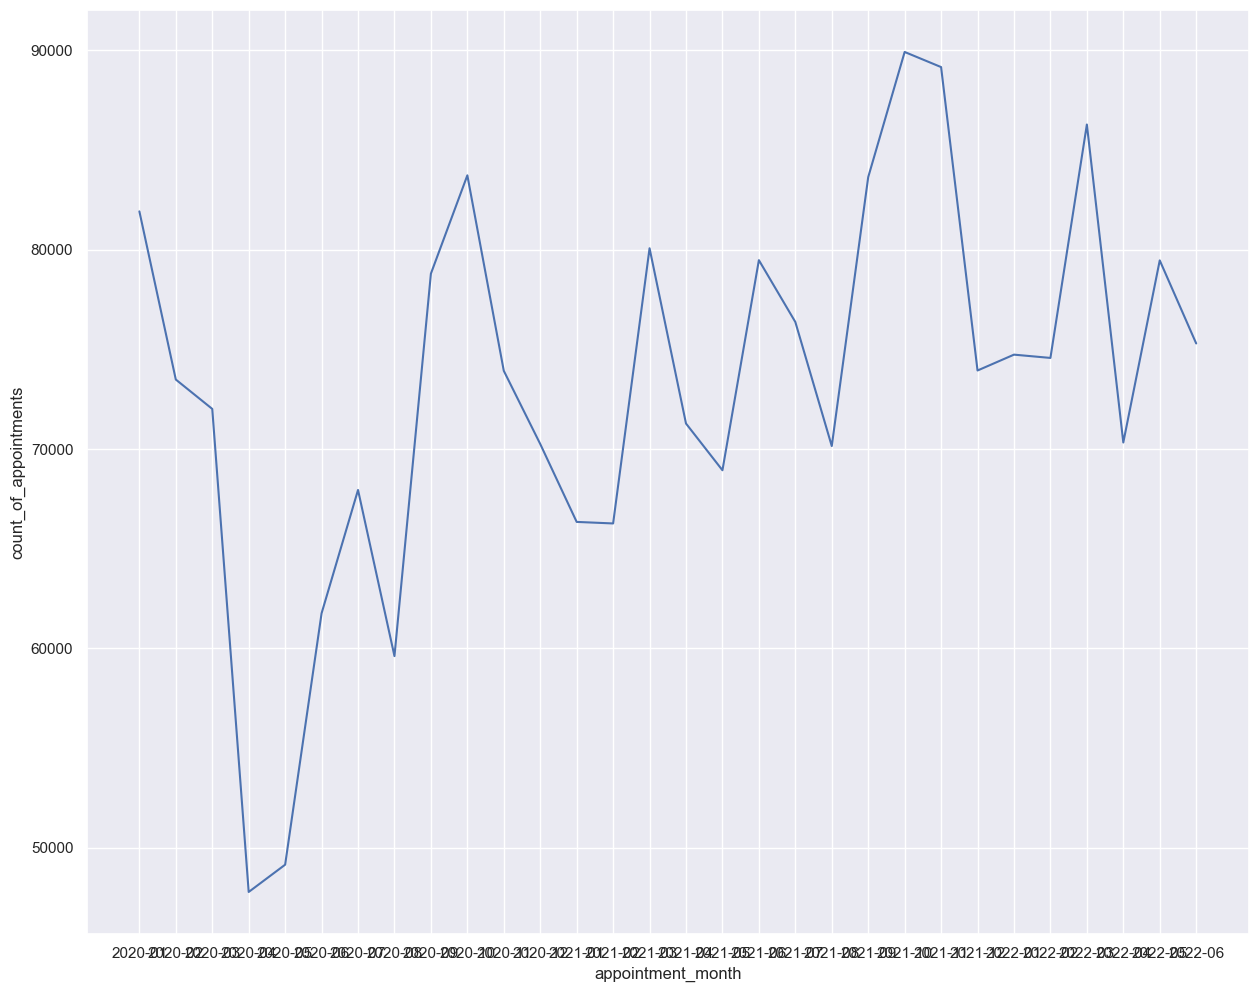

In [149]:
#Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_agg.astype({'appointment_month' : 'str'})

# Create a lineplot with Seaborn.
sns.lineplot(x="appointment_month", y="count_of_appointments", data=ar_agg, ci=None)

appointment_month  count_of_appointments  utilisation
0            2020-01               27199296     906643.2
1            2020-02               24104621     803487.4
2            2020-03               24053468     801782.3
3            2020-04               16007881     533596.0
4            2020-05               16417212     547240.4
5            2020-06               20690805     689693.5
6            2020-07               22491437     749714.6
7            2020-08               20150520     671684.0
8            2020-09               26714255     890475.2
9            2020-10               28301932     943397.7
10           2020-11               25061602     835386.7
11           2020-12               23535936     784531.2
12           2021-01               22492069     749735.6
13           2021-02               22399569     746652.3
14           2021-03               27225424     907514.1
15           2021-04               23879932     795997.7
16           2021-05               23508395     783613.2
17           2021-06               26784182     892806.1
18           2021-07               25739219     857974.0
19           2021-08               23852171     795072.4
20           2021-09               28522501     950750.0
21           2021-10               30303834    1010127.8
22           2021-11               30405070    1013502.3
23           2021-12               25140776     838025.9
24           2022-01               25635474     854515.8
25           2022-02               25355260     845175.3
26           2022-03               29595038     986501.3
27           2022-04               23913060     797102.0
28           2022-05               27495508     916516.9
29           2022-06               25828078     860935.9

<Axes: xlabel='appointment_month', ylabel='utilisation'>

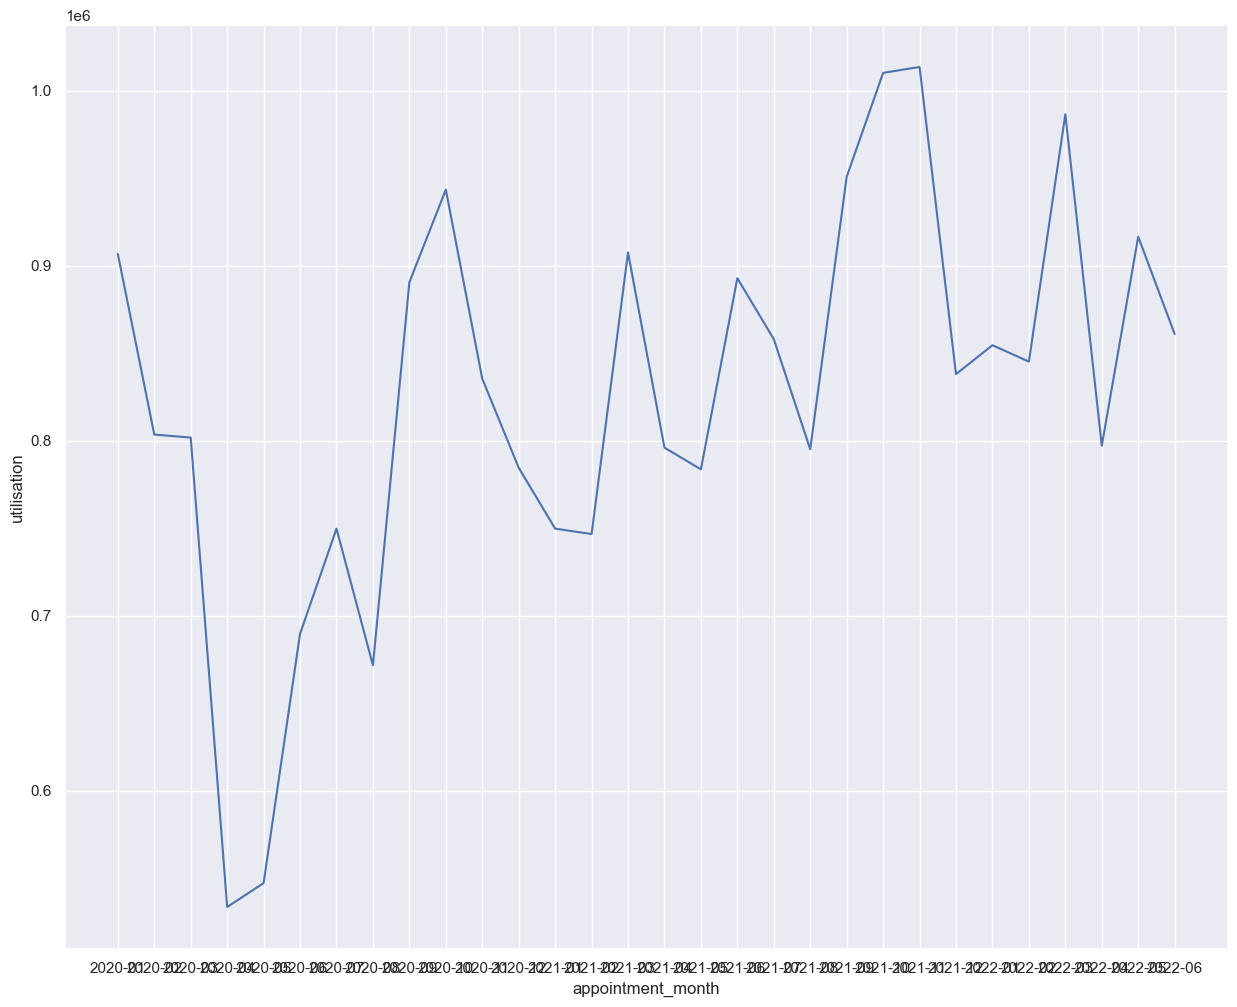

In [151]:
# Plot monthly capacity utilisation.
ar_df.astype({'appointment_month' : 'str'})

# Create a lineplot.
sns.lineplot(x="appointment_month", y="utilisation", data=ar_df)

In [213]:
# Print the min and max dates.

print("Printing appointments_regional date range :", min(ar['appointment_month']), "-",
      max(ar['appointment_month']))

Printing appointments_regional date range : 2020-01 - 2022-06


In [215]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_subset08 = ar[(ar['appointment_month'] >= '2021-08')]
ar_subset08.reset_index()

index icb_ons_code appointment_month appointment_status hcp_type  \
0         3652    E54000034           2021-08           Attended       GP   
1         3653    E54000034           2021-08           Attended       GP   
2         3654    E54000034           2021-08           Attended       GP   
3         3655    E54000034           2021-08           Attended       GP   
4         3656    E54000034           2021-08           Attended       GP   
...        ...          ...               ...                ...      ...   
223413  596816    E54000050           2022-06            Unknown  Unknown   
223414  596817    E54000050           2022-06            Unknown  Unknown   
223415  596818    E54000050           2022-06            Unknown  Unknown   
223416  596819    E54000050           2022-06            Unknown  Unknown   
223417  596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
223413          Unknown                       2 to 7 Days   
223414          Unknown                    22  to 28 Days   
223415          Unknown                     8  to 14 Days   
223416          Unknown                 More than 28 Days   
223417          Unknown                          Same Day   

        count_of_appointments  
0                        6553  
1                        2390  
2                       10547  
3                         937  
4                        4961  
...                       ...  
223413                     21  
223414                      8  
223415                     28  
223416                     17  
223417                     10  

[223418 rows x 8 columns]

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [217]:
# Create an aggregated data set to review the different features.

ar_booking = ar.groupby(['time_between_book_and_appointment'])[
    ['count_of_appointments']].sum()

# calculate proportion of when appointments are booked
ar_booking['percent'] = ar_booking['count_of_appointments']\
    / ar_booking['count_of_appointments'].sum()

ar_booking_time_sorted = ar_booking.sort_values(
    by='percent', ascending=False)

# View the DataFrame.
ar_booking_time_sorted



count_of_appointments   percent
time_between_book_and_appointment                                 
Same Day                                       342747171  0.461423
2 to 7 Days                                    153794531  0.207046
8  to 14 Days                                   86846519  0.116917
1 Day                                           67716097  0.091163
15  to 21 Days                                  42710574  0.057499
22  to 28 Days                                  25536541  0.034379
More than 28 Days                               23050987  0.031032
Unknown / Data Quality                            402105  0.000541

46% of appointments are for the same day. 
20% of  appointments are for 2 to 7 days,suggesting spare capacity and therefore under-utilised resource.I guess that some of this spare capacity is caused by no shows and also overestimating how long appointments will probably take time.


In [218]:
#Did not attent df for non-attendance only
ar_DNA = ar[(ar['appointment_status'] == 'DNA')]
ar_DNA

icb_ons_code appointment_month appointment_status hcp_type  \
69        E54000034           2020-01                DNA       GP   
70        E54000034           2020-01                DNA       GP   
71        E54000034           2020-01                DNA       GP   
72        E54000034           2020-01                DNA       GP   
73        E54000034           2020-01                DNA       GP   
...             ...               ...                ...      ...   
596756    E54000050           2022-06                DNA  Unknown   
596757    E54000050           2022-06                DNA  Unknown   
596758    E54000050           2022-06                DNA  Unknown   
596759    E54000050           2022-06                DNA  Unknown   
596760    E54000050           2022-06                DNA  Unknown   

       appointment_mode time_between_book_and_appointment  \
69         Face-to-Face                             1 Day   
70         Face-to-Face                    15  to 21 Days   
71         Face-to-Face                       2 to 7 Days   
72         Face-to-Face                    22  to 28 Days   
73         Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596756          Unknown                       2 to 7 Days   
596757          Unknown                    22  to 28 Days   
596758          Unknown                     8  to 14 Days   
596759          Unknown                 More than 28 Days   
596760          Unknown                          Same Day   

        count_of_appointments  
69                        430  
70                        452  
71                       1249  
72                        276  
73                        797  
...                       ...  
596756                      8  
596757                      1  
596758                      7  
596759                      2  
596760                      8  

[163360 rows x 7 columns]

Text(0.5, 0, 'Time between booking and appointment')

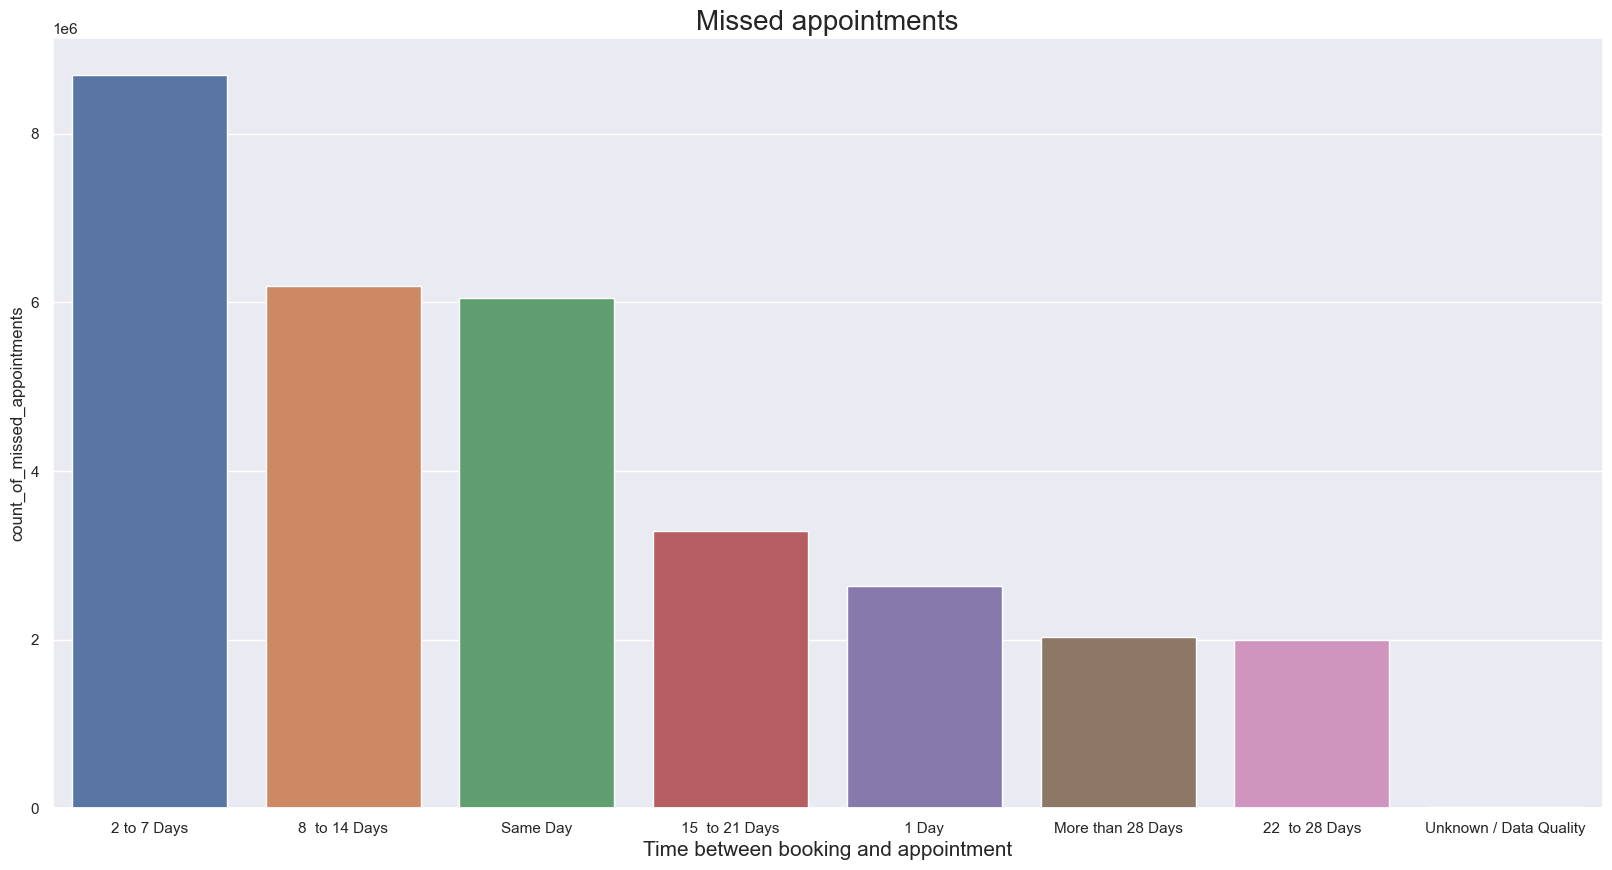

In [220]:
# groupby booking interval
ar_DNA_booking_time = ar_DNA.groupby(['time_between_book_and_appointment'])[
    ['count_of_appointments']].sum().reset_index()

# rename columns for clarification
ar_DNA_booking_time = ar_DNA_booking_time\
    .rename(columns={'count_of_appointments': 'count_of_missed_appointments'})

# sort values descending so that most unattended appointments are shown first
ar_DNA_booking_time_ordered = ar_DNA_booking_time\
    .sort_values(by='count_of_missed_appointments', ascending=False)
ar_DNA_booking_time_ordered

# plot barplot
ax_DNA = sns.barplot(x='time_between_book_and_appointment',
                     y='count_of_missed_appointments',
                     data=ar_DNA_booking_time_ordered)

sns.set(rc={'figure.figsize': (20, 10)})
plt.title('Missed appointments', fontsize=20)
ax_DNA.set_xlabel("Time between booking and appointment", fontsize=15)

In [224]:
# Determine the total number of appointments per month.
ar_total = ar.groupby(['appointment_month'])[['count_of_appointments']].sum()

ar_total

count_of_appointments
appointment_month                       
2020-01                         27199296
2020-02                         24104621
2020-03                         24053468
2020-04                         16007881
2020-05                         16417212
2020-06                         20690805
2020-07                         22491437
2020-08                         20150520
2020-09                         26714255
2020-10                         28301932
2020-11                         25061602
2020-12                         23535936
2021-01                         22492069
2021-02                         22399569
2021-03                         27225424
2021-04                         23879932
2021-05                         23508395
2021-06                         26784182
2021-07                         25739219
2021-08                         23852171
2021-09                         28522501
2021-10                         30303834
2021-11                         30405070
2021-12                         25140776
2022-01                         25635474
2022-02                         25355260
2022-03                         29595038
2022-04                         23913060
2022-05                         27495508
2022-06                         25828078

In [227]:
    # Determine the total number of appointments per month.
    #total app deep dive: attended, did not attend and unknown
ar_deep = ar.groupby(['appointment_month', 'appointment_status'])[
    ['count_of_appointments']].sum().unstack()
ar_deep

count_of_appointments                  
appointment_status              Attended      DNA  Unknown
appointment_month                                         
2020-01                         24538291  1298269  1362736
2020-02                         21640067  1215154  1249400
2020-03                         20718865  1166314  2168289
2020-04                         13982824   478766  1546291
2020-05                         14962850   449057  1005305
2020-06                         18943022   594382  1153401
2020-07                         20606888   698327  1186222
2020-08                         18438932   669462  1042126
2020-09                         23988492  1145971  1579792
2020-10                         25529275  1358138  1414519
2020-11                         23072059  1021408   968135
2020-12                         21592221   996416   947299
2021-01                         20645718   899833   946518
2021-02                         20736205   804659   858705
2021-03                         25289991   964719   970714
2021-04                         22056413   893723   929796
2021-05                         21779605   878219   850571
2021-06                         24815463  1030367   938352
2021-07                         23761001  1029665   948553
2021-08                         22081765   949137   821269
2021-09                         25757066  1321348  1444087
2021-10                         27170506  1565624  1567704
2021-11                         27667665  1428087  1309318
2021-12                         22853483  1198866  1088427
2022-01                         23597196  1076013   962265
2022-02                         23351939  1076658   926663
2022-03                         27170002  1289888  1135148
2022-04                         21948814  1045455   918791
2022-05                         25343941  1199518   952049
2022-06                         23715317  1167790   944971

In [230]:
# Add a new column to indicate the average utilisation of services.
    #(unknown data ~5% of total)

ar_deep['utilisation%'] = ar_deep[('count_of_appointments', 'Attended')]\
    / (ar_deep[('count_of_appointments', 'Attended')]
       + ar_deep[('count_of_appointments', 'DNA')])
ar_deep 


count_of_appointments                   utilisation%  \
appointment_status              Attended      DNA  Unknown                
appointment_month                                                         
2020-01                         24538291  1298269  1362736     0.949751   
2020-02                         21640067  1215154  1249400     0.946833   
2020-03                         20718865  1166314  2168289     0.946708   
2020-04                         13982824   478766  1546291     0.966894   
2020-05                         14962850   449057  1005305     0.970863   
2020-06                         18943022   594382  1153401     0.969577   
2020-07                         20606888   698327  1186222     0.967223   
2020-08                         18438932   669462  1042126     0.964965   
2020-09                         23988492  1145971  1579792     0.954406   
2020-10                         25529275  1358138  1414519     0.949488   
2020-11                         23072059  1021408   968135     0.957606   
2020-12                         21592221   996416   947299     0.955889   
2021-01                         20645718   899833   946518     0.958236   
2021-02                         20736205   804659   858705     0.962645   
2021-03                         25289991   964719   970714     0.963255   
2021-04                         22056413   893723   929796     0.961058   
2021-05                         21779605   878219   850571     0.961240   
2021-06                         24815463  1030367   938352     0.960134   
2021-07                         23761001  1029665   948553     0.958466   
2021-08                         22081765   949137   821269     0.958789   
2021-09                         25757066  1321348  1444087     0.951203   
2021-10                         27170506  1565624  1567704     0.945517   
2021-11                         27667665  1428087  1309318     0.950918   
2021-12                         22853483  1198866  1088427     0.950156   
2022-01                         23597196  1076013   962265     0.956389   
2022-02                         23351939  1076658   926663     0.955926   
2022-03                         27170002  1289888  1135148     0.954677   
2022-04                         21948814  1045455   918791     0.954534   
2022-05                         25343941  1199518   952049     0.954809   
2022-06                         23715317  1167790   944971     0.953069   

                   daily_attendance  
appointment_status                   
appointment_month                    
2020-01                    817943.0  
2020-02                    721336.0  
2020-03                    690629.0  
2020-04                    466094.0  
2020-05                    498762.0  
2020-06                    631434.0  
2020-07                    686896.0  
2020-08                    614631.0  
2020-09                    799616.0  
2020-10                    850976.0  
2020-11                    769069.0  
2020-12                    719741.0  
2021-01                    688191.0  
2021-02                    691207.0  
2021-03                    843000.0  
2021-04                    735214.0  
2021-05                    725987.0  
2021-06                    827182.0  
2021-07                    792033.0  
2021-08                    736059.0  
2021-09                    858569.0  
2021-10                    905684.0  
2021-11                    922256.0  
2021-12                    761783.0  
2022-01                    786573.0  
2022-02                    778398.0  
2022-03                    905667.0  
2022-04                    731627.0  
2022-05                    844798.0  
2022-06                    790511.0

In [229]:
# Monthly aggregate / 30 to get to a daily value.
ar_deep['daily_attendance'] = (
    ar_deep[('count_of_appointments', 'Attended')]/30).round()

# View the DataFrame.
ar_deep
# we cannot reach a firm conclusion on whether or not staffing levels should be increased based on this output.

count_of_appointments                   utilisation%  \
appointment_status              Attended      DNA  Unknown                
appointment_month                                                         
2020-01                         24538291  1298269  1362736     0.949751   
2020-02                         21640067  1215154  1249400     0.946833   
2020-03                         20718865  1166314  2168289     0.946708   
2020-04                         13982824   478766  1546291     0.966894   
2020-05                         14962850   449057  1005305     0.970863   
2020-06                         18943022   594382  1153401     0.969577   
2020-07                         20606888   698327  1186222     0.967223   
2020-08                         18438932   669462  1042126     0.964965   
2020-09                         23988492  1145971  1579792     0.954406   
2020-10                         25529275  1358138  1414519     0.949488   
2020-11                         23072059  1021408   968135     0.957606   
2020-12                         21592221   996416   947299     0.955889   
2021-01                         20645718   899833   946518     0.958236   
2021-02                         20736205   804659   858705     0.962645   
2021-03                         25289991   964719   970714     0.963255   
2021-04                         22056413   893723   929796     0.961058   
2021-05                         21779605   878219   850571     0.961240   
2021-06                         24815463  1030367   938352     0.960134   
2021-07                         23761001  1029665   948553     0.958466   
2021-08                         22081765   949137   821269     0.958789   
2021-09                         25757066  1321348  1444087     0.951203   
2021-10                         27170506  1565624  1567704     0.945517   
2021-11                         27667665  1428087  1309318     0.950918   
2021-12                         22853483  1198866  1088427     0.950156   
2022-01                         23597196  1076013   962265     0.956389   
2022-02                         23351939  1076658   926663     0.955926   
2022-03                         27170002  1289888  1135148     0.954677   
2022-04                         21948814  1045455   918791     0.954534   
2022-05                         25343941  1199518   952049     0.954809   
2022-06                         23715317  1167790   944971     0.953069   

                   daily_attendance  
appointment_status                   
appointment_month                    
2020-01                    817943.0  
2020-02                    721336.0  
2020-03                    690629.0  
2020-04                    466094.0  
2020-05                    498762.0  
2020-06                    631434.0  
2020-07                    686896.0  
2020-08                    614631.0  
2020-09                    799616.0  
2020-10                    850976.0  
2020-11                    769069.0  
2020-12                    719741.0  
2021-01                    688191.0  
2021-02                    691207.0  
2021-03                    843000.0  
2021-04                    735214.0  
2021-05                    725987.0  
2021-06                    827182.0  
2021-07                    792033.0  
2021-08                    736059.0  
2021-09                    858569.0  
2021-10                    905684.0  
2021-11                    922256.0  
2021-12                    761783.0  
2022-01                    786573.0  
2022-02                    778398.0  
2022-03                    905667.0  
2022-04                    731627.0  
2022-05                    844798.0  
2022-06                    790511.0

In [236]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar['appointment_month'] = ar['appointment_month'].astype(str)

    #specify mode is home visit
ar_hv = ar[(ar['appointment_mode'] == 'Home Visit')]
ar_hv_by_month = ar_hv.groupby(['appointment_month'])[
    ['count_of_appointments']].sum()

# renameing columns for clarity
ar_hv_by_month = ar_hv_by_month.rename(
    columns={'count_of_appointments': 'count_of_home_visit_appointments'})
ar_hv_by_month.reset_index()



appointment_month  count_of_home_visit_appointments
0            2020-01                            266942
1            2020-02                            227935
2            2020-03                            172773
3            2020-04                            100673
4            2020-05                            112018
5            2020-06                            133805
6            2020-07                            140787
7            2020-08                            119250
8            2020-09                            148978
9            2020-10                            161721
10           2020-11                            150187
11           2020-12                            137310
12           2021-01                            129033
13           2021-02                            130396
14           2021-03                            154148
15           2021-04                            148827
16           2021-05                            142291
17           2021-06                            161666
18           2021-07                            157992
19           2021-08                            151619
20           2021-09                            171829
21           2021-10                            178593
22           2021-11                            203352
23           2021-12                            181264
24           2022-01                            171669
25           2022-02                            170435
26           2022-03                            200945
27           2022-04                            172936
28           2022-05                            200862
29           2022-06                            187640

Text(2020-03, 175000, 'Lockdown')

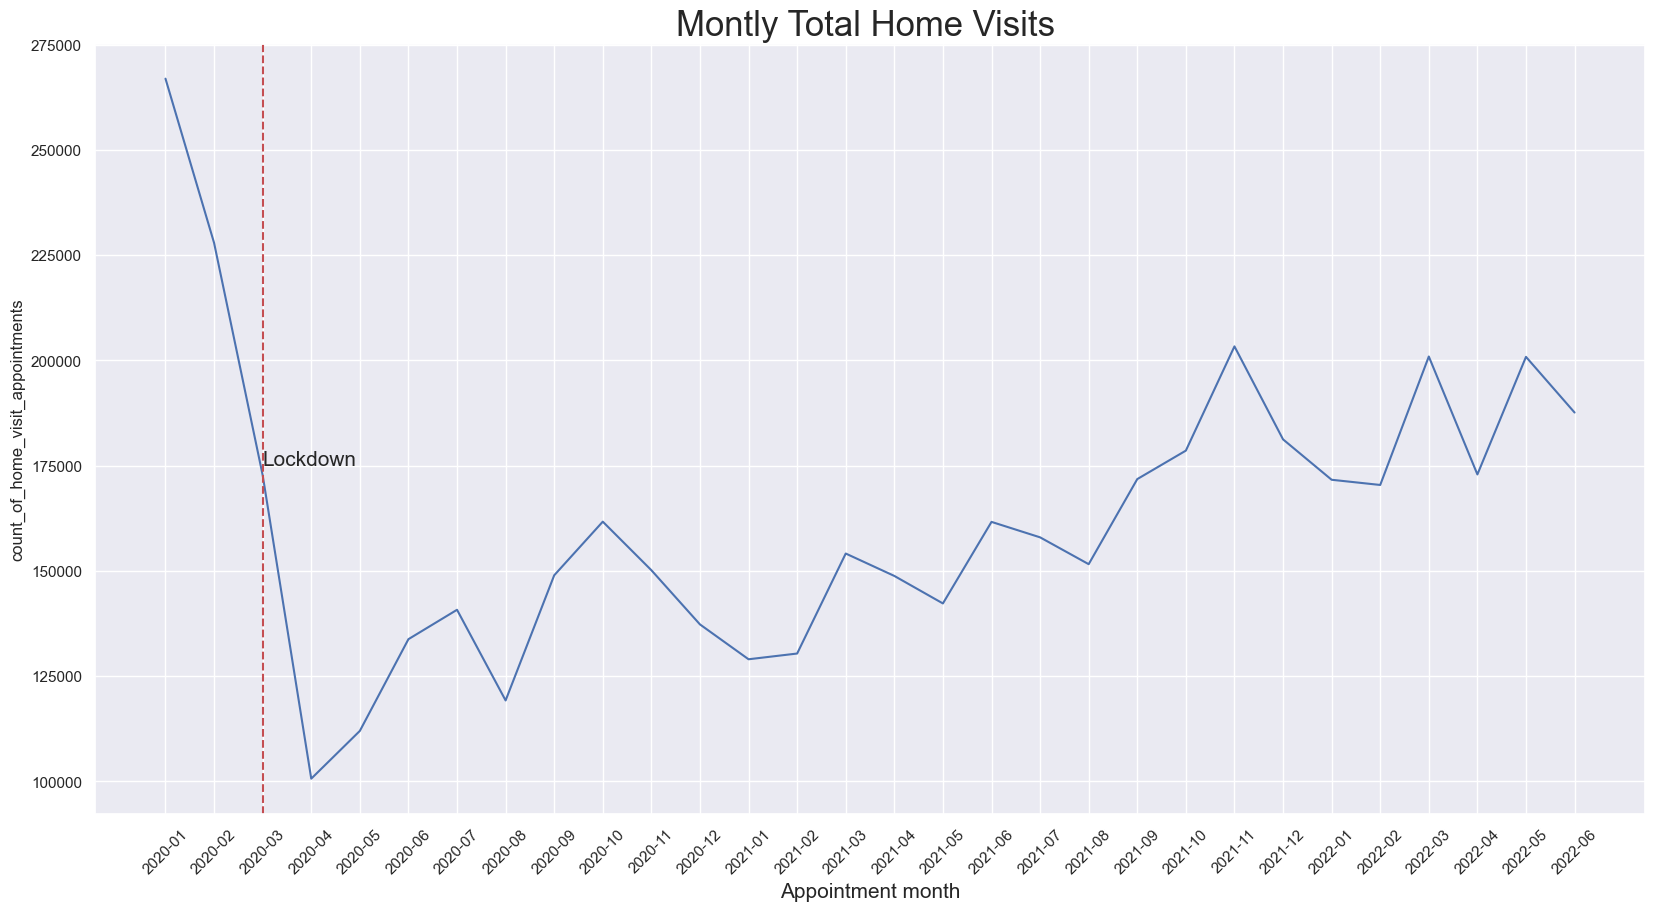

In [243]:
# Create a lineplot with Seaborn.
fig1, ax1 = plt.subplots(figsize=(20, 10))

sns.lineplot(x='appointment_month',
             y='count_of_home_visit_appointments',
             data=ar_hv_by_month)\
    .set_title("Montly Total Home Visits ", fontsize=25)
plt.xticks(rotation=45)
ax1.set_xlabel("Appointment month", fontsize=15)
plt.axvline(x='2020-03', color='r', linestyle='--')
ax1.annotate('Lockdown', ('2020-03', 175000), fontsize=15)

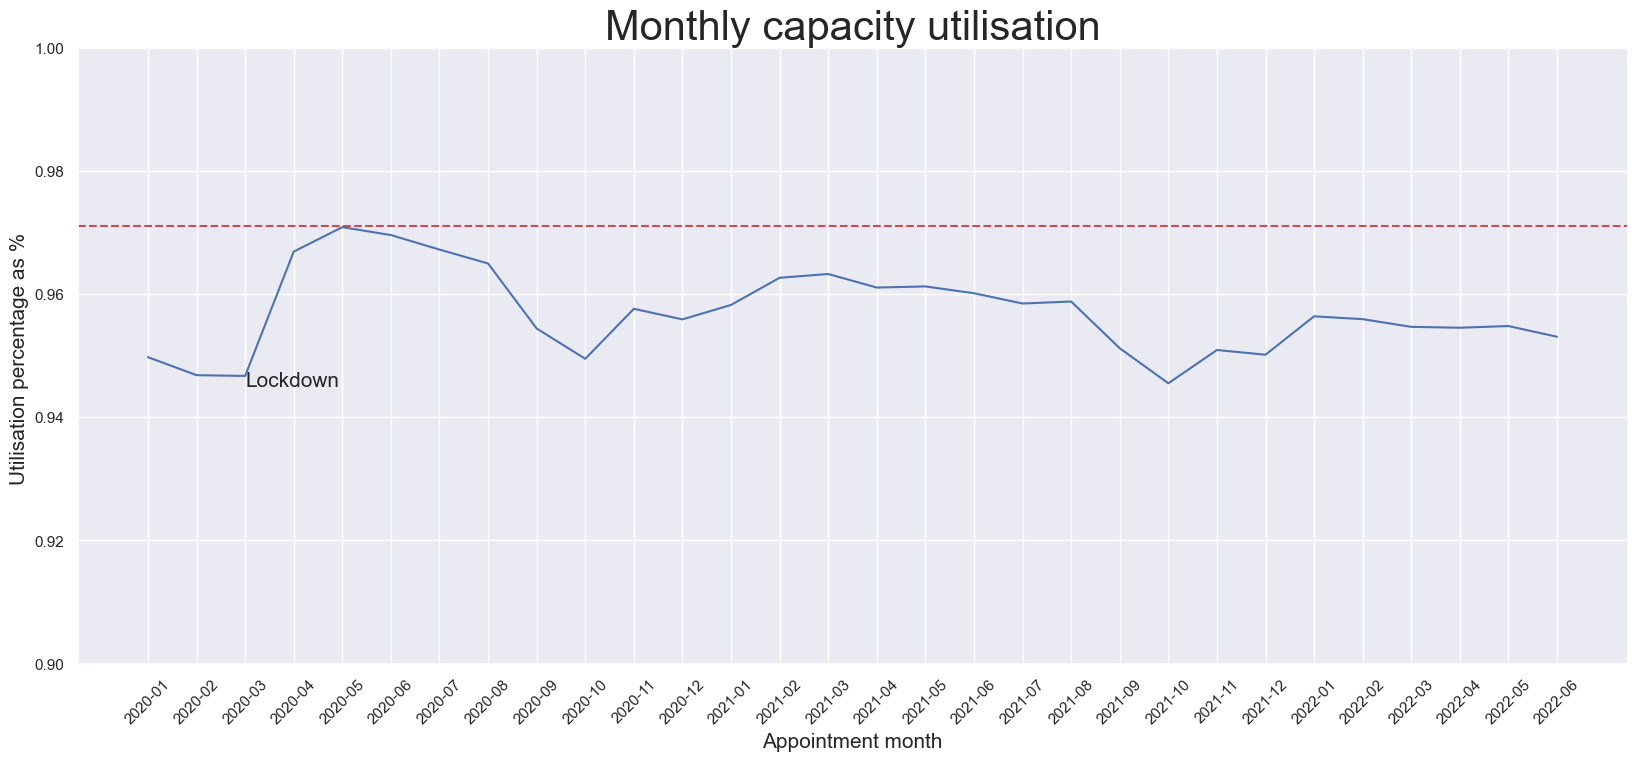

In [263]:
# Plot monthly capacity utilisation.
# Create a lineplot.
fig2, ax2 = plt.subplots(figsize=(20, 8))

sns.lineplot(x='appointment_month',
             y='utilisation%',
             data=ar_deep)\
    .set_title("Monthly capacity utilisation", fontsize=30)
plt.xticks(rotation=45)
ax2.set_ylim([0.9, 1])
ax2.set_xlabel("Appointment month", fontsize=15)
ax2.set_ylabel("Utilisation percentage as % ", fontsize=15)
plt.axhline(y=0.971, color='r', linestyle='--')
ax2.annotate('Lockdown', ('2020-03',0.945 ), fontsize=15)
plt.show()




**Question 2:** How do the healthcare professional types differ over time?

In [290]:
# create subsets by each healthcare professional type

    #for GP- hcp_type
ar_type_GP = ar[(ar['hcp_type'] == 'GP')]\
    .groupby('appointment_month')[['count_of_appointments']].sum()
ar_type_GP = ar_type_GP.rename(columns={'count_of_appointments': 'GP_appts'})
    
    #For other

ar_type_other = ar[(ar['hcp_type'] == 'Other Practice staff')]\
    .groupby('appointment_month')[['count_of_appointments']].sum()
ar_type_other = ar_type_other.rename(
    columns={'count_of_appointments': 'other_appts'})
    

    # columns views with merging as ar_by_types 
ar_type_merge1 = pd.merge(ar_type_GP, ar_type_other, on='appointment_month')
ar_type_merge2 = pd.merge(
    ar_type_merge1, ar_type_unknown, on='appointment_month')
ar_by_types = ar_type_merge2.reset_index()
ar_by_types


appointment_month  GP_appts  other_appts  unknown_appts
0            2020-01  14168932     12326031         704333
1            2020-02  12467976     11002550         634095
2            2020-03  12839993     10498713         714762
3            2020-04   8795939      6704003         507939
4            2020-05   8924583      6993557         499072
5            2020-06  11054065      9047092         589648
6            2020-07  11701906     10108127         681404
7            2020-08  10481447      9037362         631711
8            2020-09  13187253     12660278         866724
9            2020-10  13182629     14150521         968782
10           2020-11  12501963     11760406         799233
11           2020-12  11759814     11021668         754454
12           2021-01  11806927     10001104         684038
13           2021-02  11827794      9894163         677612
14           2021-03  14391125     11973606         860693
15           2021-04  12462924     10635500         781508
16           2021-05  12334764     10402894         770737
17           2021-06  14050148     11866623         867411
18           2021-07  13338516     11583564         817139
19           2021-08  12299022     10797821         755328
20           2021-09  14487785     13126731         907985
21           2021-10  14300751     14942504        1060579
22           2021-11  14897749     14432800        1074521
23           2021-12  12654767     11614470         871539
24           2022-01  13138050     11705142         792282
25           2022-02  12869711     11688107         797442
26           2022-03  15127227     13528583         939228
27           2022-04  11908463     11217738         786859
28           2022-05  13793934     12823200         878374
29           2022-06  12893983     12105677         828418

Text(0.5, 0.92, 'Subsets by Healthcare Professional Types')

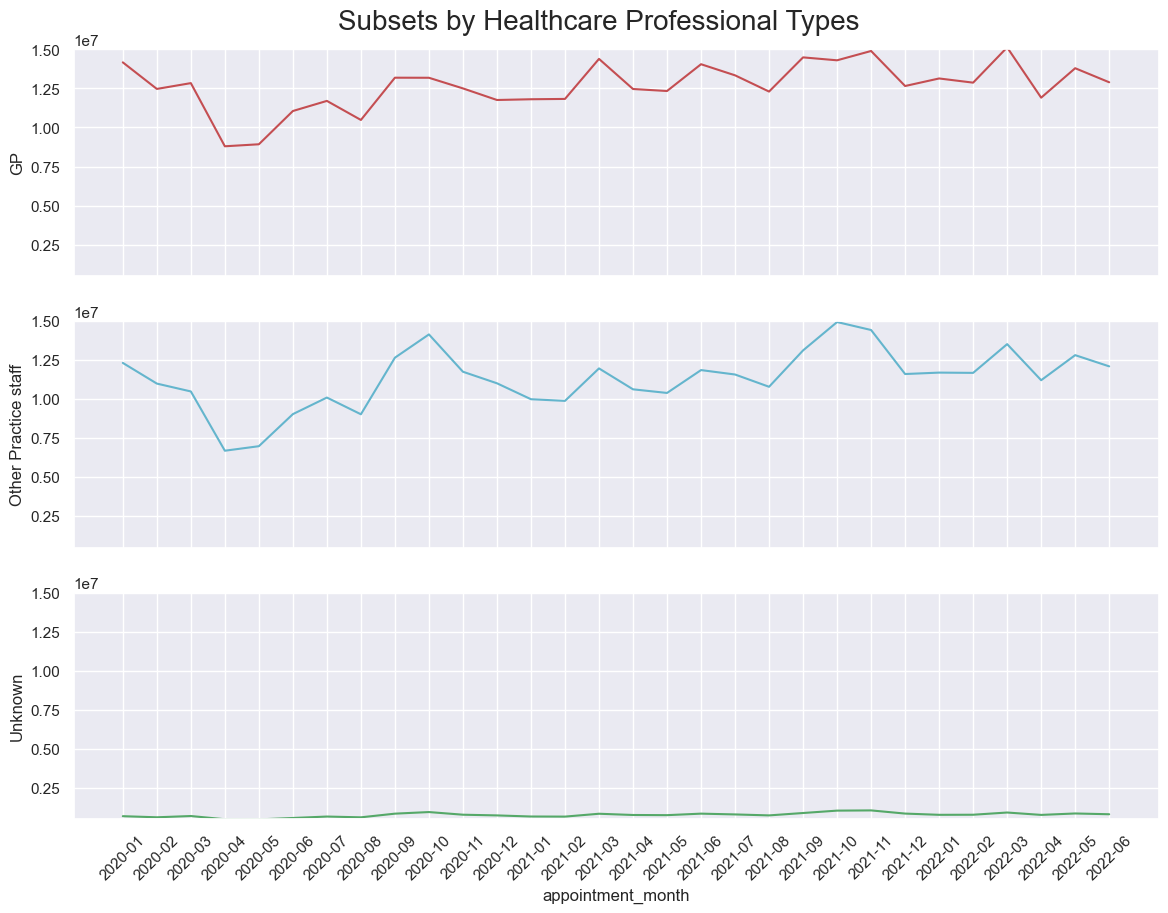

In [294]:
fig3, axes3 = plt.subplots(nrows=3)
fig3.set_size_inches(14, 10)

# define the different lines
GP_lines = axes3[0].plot(ar_by_types['appointment_month'],
                         ar_by_types['GP_appts'], "r")
other_lines = axes3[1].plot(
    ar_by_types['appointment_month'], ar_by_types['other_appts'], "c")
practice_lines = axes3[2].plot(
    ar_by_types['appointment_month'], ar_by_types['unknown_appts'], "g")
axes3[0].set_xticklabels([])
axes3[1].set_xticklabels([])

# x label only for the last plot
axes3[2].set_xlabel("appointment_month")
axes3[0].set_ylabel("GP")
axes3[1].set_ylabel("Other Practice staff")
axes3[2].set_ylabel("Unknown")
plt.xticks(rotation=45)
axes3[0].set_ylim([500000, 15000000])
axes3[1].set_ylim([500000, 15000000])
axes3[2].set_ylim([500000, 15000000])

fig3.suptitle("Subsets by Healthcare Professional Types",
              fontsize=20, y=0.92)

[Text(0, 0.5, 'hcp_type_count')]

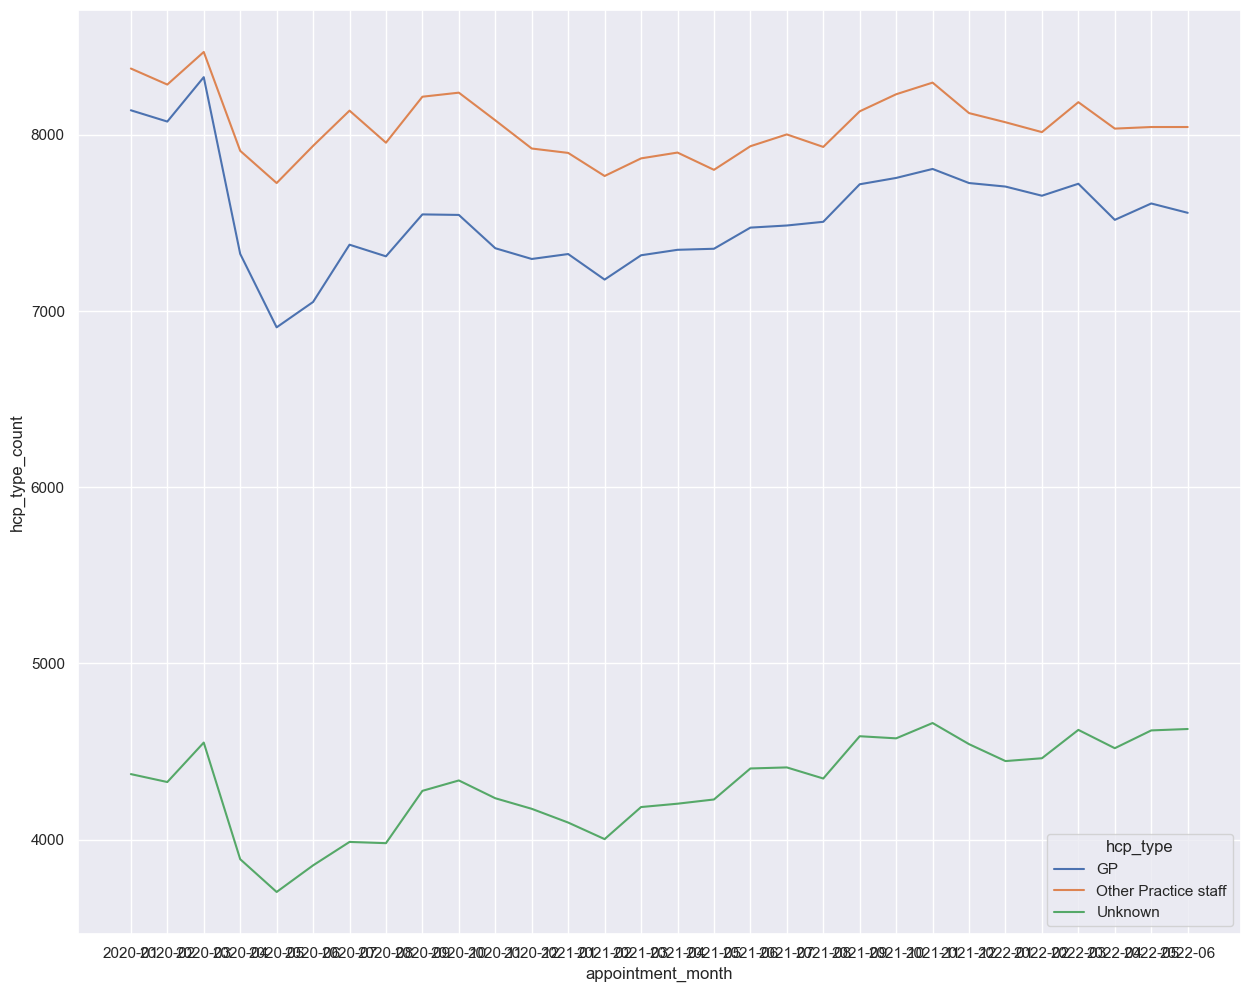

In [158]:
# Determine the total number of appointments per month.
ar_hcp = ar.groupby([ar['appointment_month'], ar['hcp_type']])[['hcp_type']].value_counts().reset_index()

# Create a line plot to answer the question.
ar_hcp_plot = sns.lineplot(x="appointment_month", y=0, hue ='hcp_type', data=ar_hcp, ci=None)
ar_hcp_plot.set(ylabel='hcp_type_count')

plt.show()

In [268]:
# Create a line plot to answer the question.
    #face to face
ar_face_to_face = ar[ar['appointment_mode'] == 'Face-to-Face']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_face_to_face = ar_face_to_face.rename(
    columns={'count_of_appointments': 'Face-to-Face'})

    #homevisits
ar_home_visits = ar[ar['appointment_mode'] == 'Home Visit']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_home_visits = ar_home_visits.rename(
    columns={'count_of_appointments': 'home_visits'})

    #Telephone
ar_telephone = ar[ar['appointment_mode'] == 'Telephone']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_telephone = ar_telephone.rename(
    columns={'count_of_appointments': 'Telephone'})
    
    #Video
ar_video = ar[ar['appointment_mode'] == 'Video/Online']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_video = ar_video.rename(columns={'count_of_appointments': 'Video'})

    #Did not Attent
ar_DNA = ar[ar['appointment_status'] == 'DNA']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_DNA = ar_DNA.rename(columns={'count_of_appointments': 'not_attended_appts'})

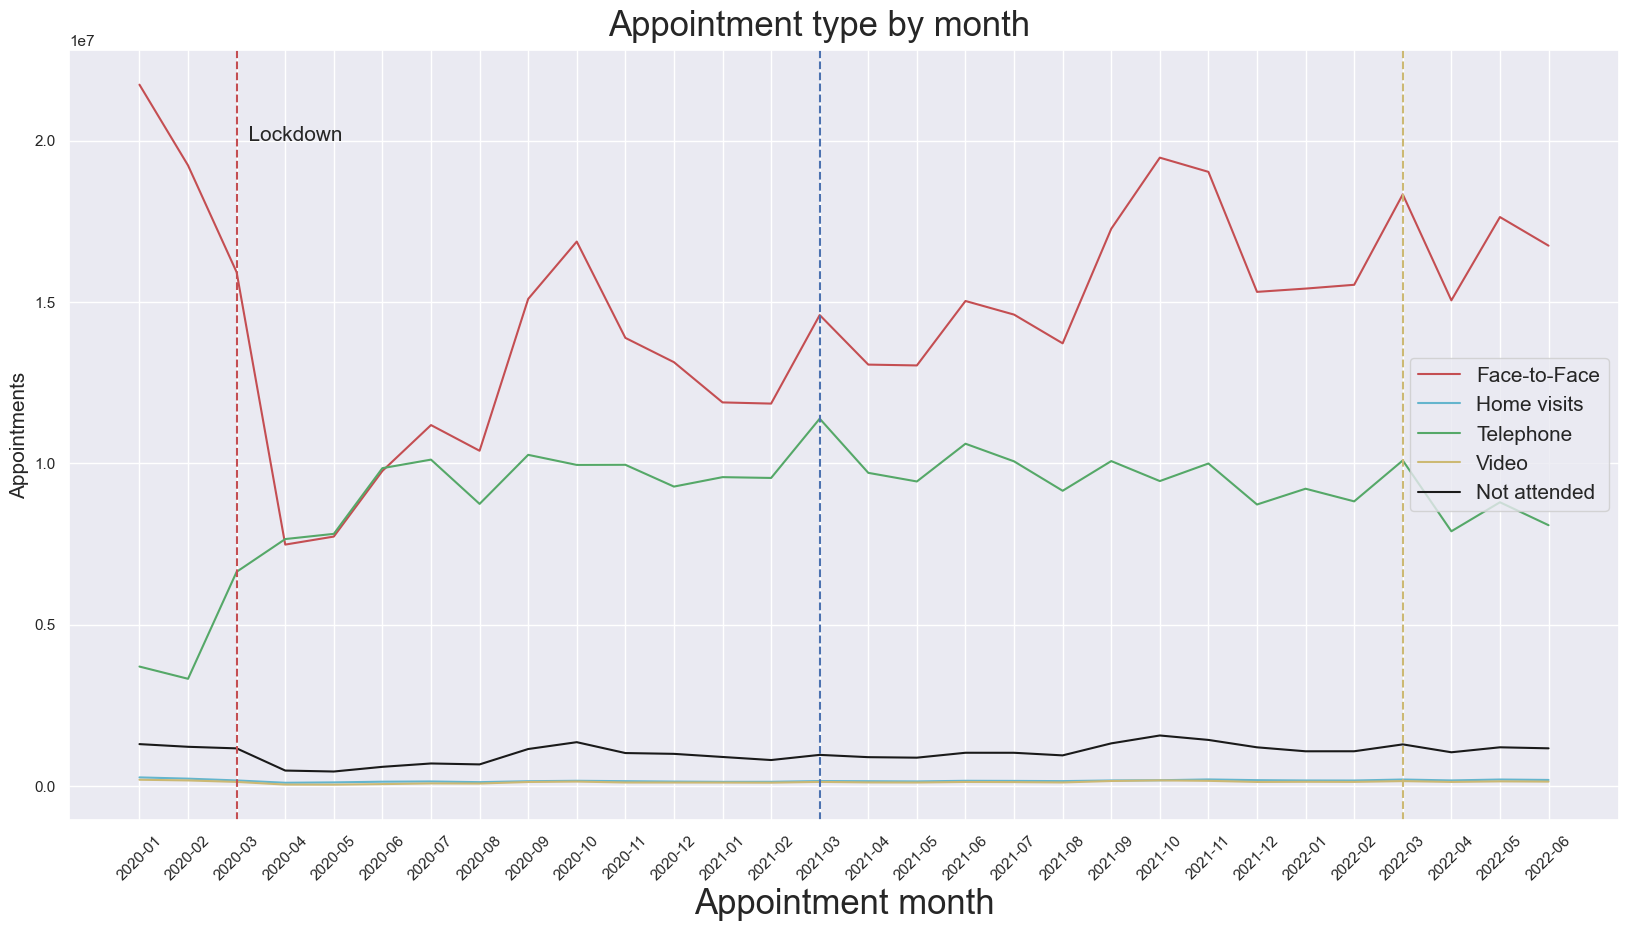

In [280]:
fig6, ax6 = plt.subplots(figsize=(20, 10))

ax6.plot(ar_face_to_face['appointment_month'],
         ar_face_to_face['Face-to-Face'], "r")
ax6.plot(ar_home_visits['appointment_month'],
         ar_home_visits['home_visits'], "c")
ax6.plot(ar_telephone['appointment_month'], ar_telephone['Telephone'], "g")
ax6.plot(ar_video['appointment_month'], ar_video['Video'], "y")
ax6.plot(ar_DNA['appointment_month'], ar_DNA['not_attended_appts'], "k")
ax6.tick_params(axis='x', labelrotation=45)
ax6.legend(['Face-to-Face', 'Home visits', 'Telephone',
           'Video', 'Not attended'], loc=5, fontsize=15)
ax6.axvline(x='2020-03', color='r', linestyle='--')
ax6.annotate('  Lockdown', ('2020-03', 20000000), fontsize=15)
fig6.suptitle("Appointment type by month", fontsize=25, y=0.92)
ax6.set_xlabel("Appointment month", fontsize=25)
ax6.set_ylabel("Appointments", fontsize=15)
ax6.axvline(x='2021-03', color='b', linestyle='--')
ax6.axvline(x='2022-03', color='y', linestyle='--')

**Question 3:** Are there significant changes in whether or not visits are attended?

In [121]:
# defining subsets as home visits that were attended and unattended...

ar_home_visits_att = ar[(ar['appointment_mode'] == 'Home Visit')
                        & (ar['appointment_status'] == 'Attended')]\
    .groupby('appointment_month')[['count_of_appointments']].sum().reset_index()
ar_home_visits_att = ar_home_visits_att.rename(
    columns={'count_of_appointments': 'attended_home_appts'})

ar_home_visits_dna = ar[(ar['appointment_mode'] == 'Home Visit')
                        & (ar['appointment_status'] == 'DNA')]\
    .groupby('appointment_month')[['count_of_appointments']].sum().reset_index()
ar_home_visits_dna = ar_home_visits_dna.rename(
    columns={'count_of_appointments': 'not_attended_home_appts'})


Text(0.5, 0.92, 'Home Visits Attendance')

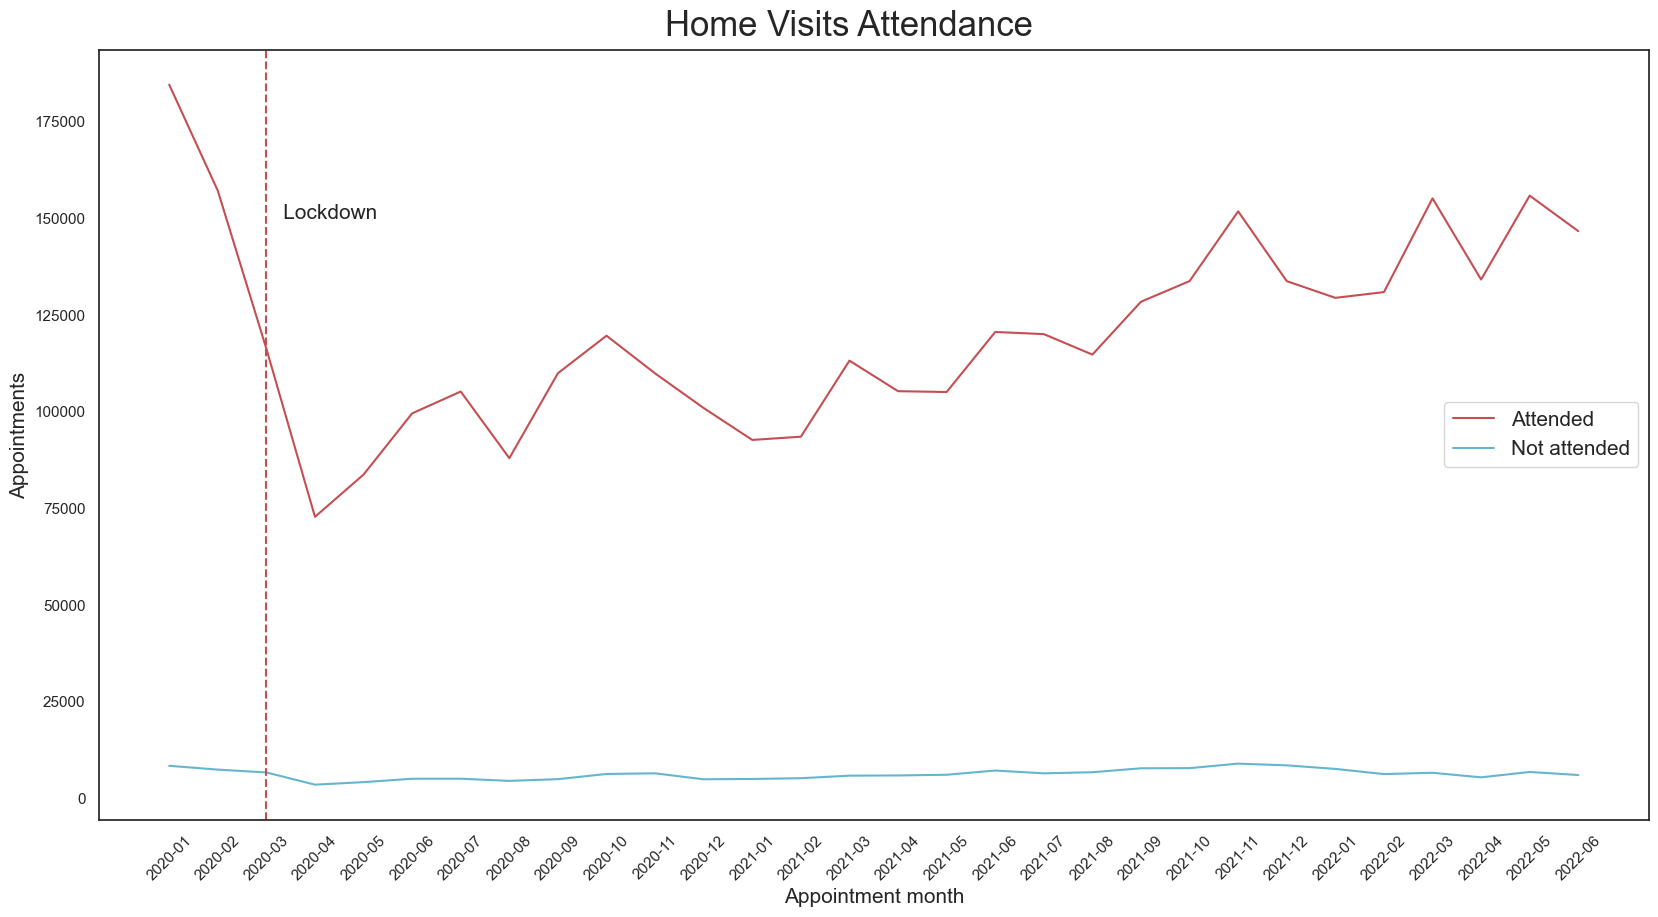

In [124]:
fig5, ax5 = plt.subplots(figsize=(20, 10))

ax5.plot(ar_home_visits_att['appointment_month'],
         ar_home_visits_att['attended_home_appts'], "r")
ax5.plot(ar_home_visits_dna['appointment_month'],
         ar_home_visits_dna['not_attended_home_appts'], "c")
ax5.tick_params(axis='x', labelrotation=45)
ax5.legend(['Attended', 'Not attended'], loc=5, fontsize=15)
ax5.axvline(x='2020-03', color='r', linestyle='--')
ax5.annotate('   Lockdown', ('2020-03', 150000), fontsize=15)
ax5.set_xlabel("Appointment month", fontsize=15)
ax5.set_ylabel("Appointments", fontsize=15)
fig5.suptitle("Home Visits Attendance", fontsize=25, y=0.92)

[Text(0, 0.5, 'appointment_status_count')]

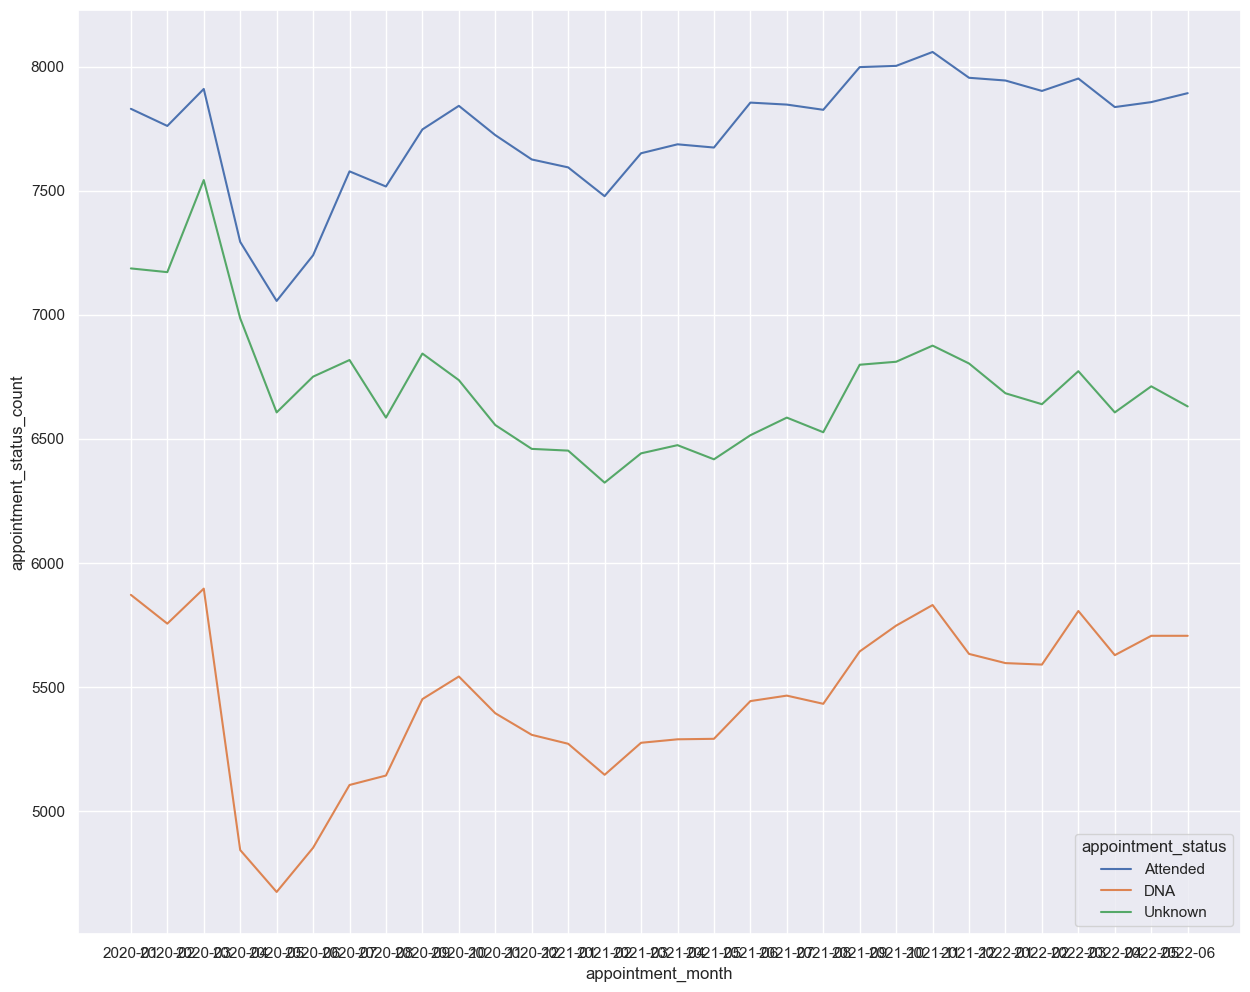

In [160]:
#Determine the total number of appointments per month.
ar_hcp = ar.groupby([ar['appointment_month'], ar['appointment_status']])[['appointment_status']].value_counts().reset_index()

# Create a line plot to answer the question.
ar_hcp_plot2 = sns.lineplot(x="appointment_month", y=0, hue ='appointment_status', data=ar_hcp, ci=None)
ar_hcp_plot2.set(ylabel='appointment_status_count')
plt.show()

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [119]:
# Create a line plot to answer the question.
    #First,creating subsets by appointment type:
    
        #Face to Face

ar_face_to_face = ar[ar['appointment_mode'] == 'Face-to-Face']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_face_to_face = ar_face_to_face.rename(
    columns={'count_of_appointments': 'Face-to-Face'})

        #homevisits
ar_home_visits = ar[ar['appointment_mode'] == 'Home Visit']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_home_visits = ar_home_visits.rename(
    columns={'count_of_appointments': 'home_visits'})

        #Telephone
ar_telephone = ar[ar['appointment_mode'] == 'Telephone']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_telephone = ar_telephone.rename(
    columns={'count_of_appointments': 'Telephone'})
    
        #Video
ar_video = ar[ar['appointment_mode'] == 'Video/Online']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_video = ar_video.rename(columns={'count_of_appointments': 'Video'})

        #Did not Attent
ar_DNA = ar[ar['appointment_status'] == 'DNA']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_DNA = ar_DNA.rename(columns={'count_of_appointments': 'not_attended_appts'})


In [118]:
ar_DNA.head()
ar_video.head()
ar_telephone.head()
ar_home_visits.head()
ar_face_to_face.head()

appointment_month  Face-to-Face
0           2020-01      21733394
1           2020-02      19230573
2           2020-03      15921794
3           2020-04       7480941
4           2020-05       7729597

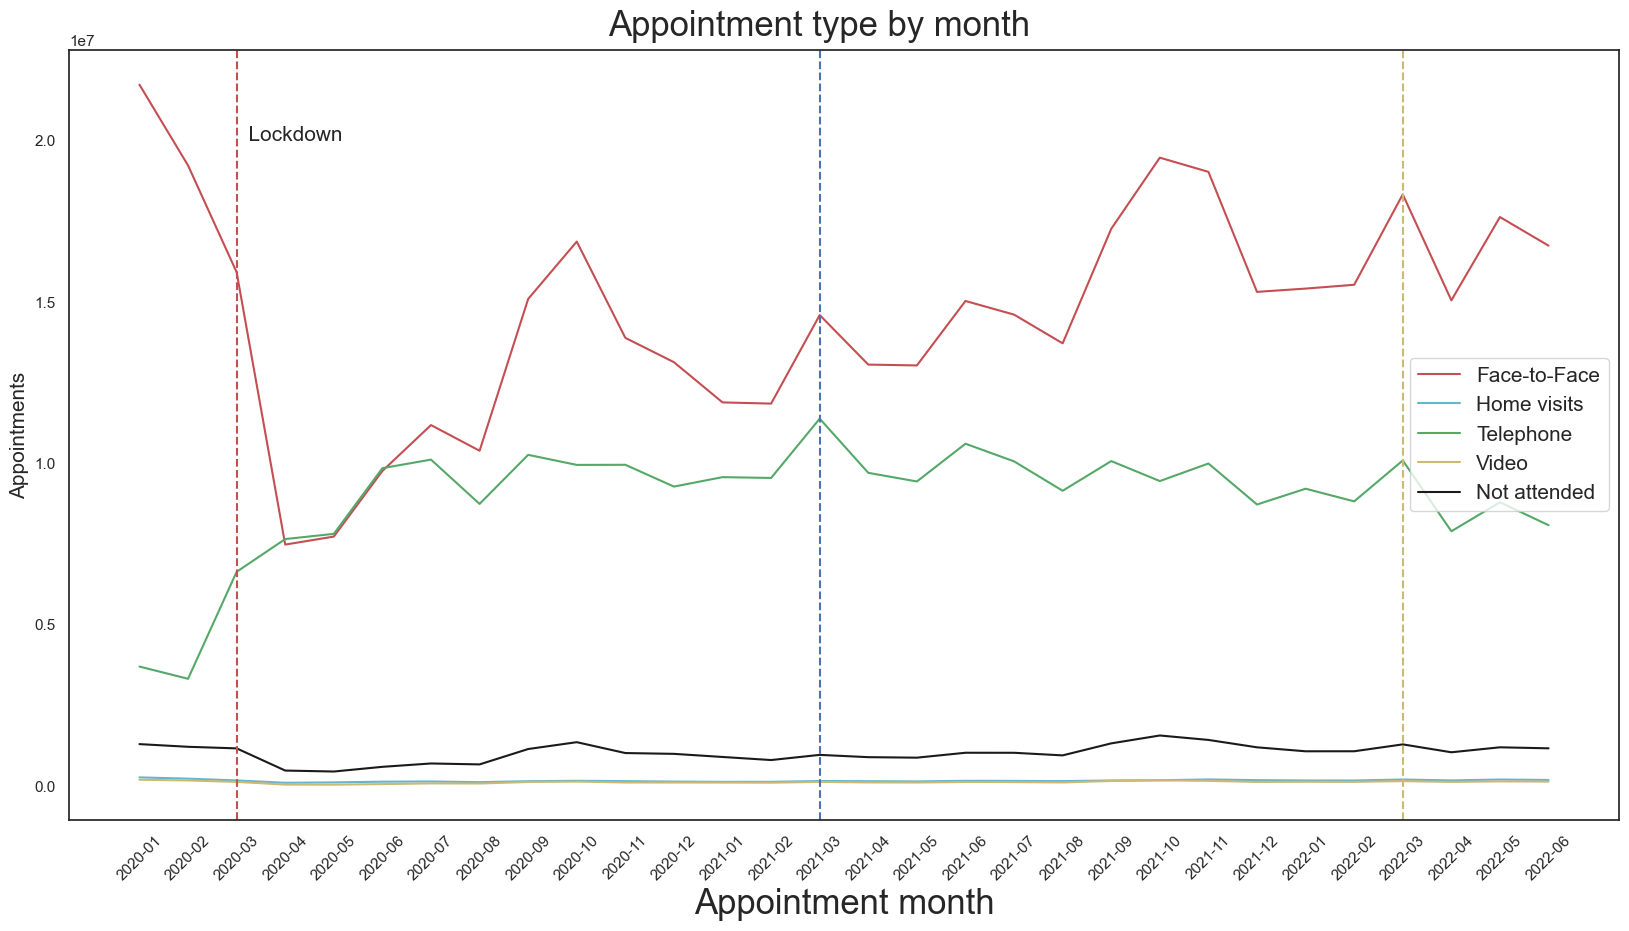

In [120]:
# Create a line plot to answer the question.
fig6, ax6 = plt.subplots(figsize=(20, 10))

ax6.plot(ar_face_to_face['appointment_month'],
         ar_face_to_face['Face-to-Face'], "r")
ax6.plot(ar_home_visits['appointment_month'],
         ar_home_visits['home_visits'], "c")
ax6.plot(ar_telephone['appointment_month'], ar_telephone['Telephone'], "g")
ax6.plot(ar_video['appointment_month'], ar_video['Video'], "y")
ax6.plot(ar_DNA['appointment_month'], ar_DNA['not_attended_appts'], "k")
ax6.tick_params(axis='x', labelrotation=45)
ax6.legend(['Face-to-Face', 'Home visits', 'Telephone',
           'Video', 'Not attended'], loc=5, fontsize=15)
ax6.axvline(x='2020-03', color='r', linestyle='--')
ax6.annotate('  Lockdown', ('2020-03', 20000000), fontsize=15)
fig6.suptitle("Appointment type by month", fontsize=25, y=0.92)
ax6.set_xlabel("Appointment month", fontsize=25)
ax6.set_ylabel("Appointments", fontsize=15)
ax6.axvline(x='2021-03', color='b', linestyle='--')
ax6.axvline(x='2022-03', color='y', linestyle='--')

**Question 5:** Are there any trends in time between booking an appointment?

In [125]:
# Create a line plot to answer the question.
ar_sameday = ar[ar['time_between_book_and_appointment'] == 'Same Day']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_sameday = ar_sameday.rename(columns={'count_of_appointments': 'same_day'})

ar_1day = ar[ar['time_between_book_and_appointment'] == '1 Day']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_1day = ar_1day.rename(columns={'count_of_appointments': '1_day'})

ar_2to7 = ar[ar['time_between_book_and_appointment'] == '2 to 7 Days']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_2to7 = ar_2to7.rename(columns={'count_of_appointments': '2_to_7_days'})

ar_8to14 = ar[(ar['time_between_book_and_appointment'] == '8  to 14 Days')]\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_8to14 = ar_8to14.rename(columns={'count_of_appointments': '8_to_14_days'})

ar_15plus = ar[ar['time_between_book_and_appointment']
               .isin(['15  to 21 Days', '22  to 28 Days', 'More than 28 Days'])]\
    .groupby('appointment_month')[['count_of_appointments']].sum().reset_index()
ar_15plus = ar_15plus.rename(
    columns={'count_of_appointments': 'More_than_14_days'})

Text(0, 0.5, 'Total Appointments')

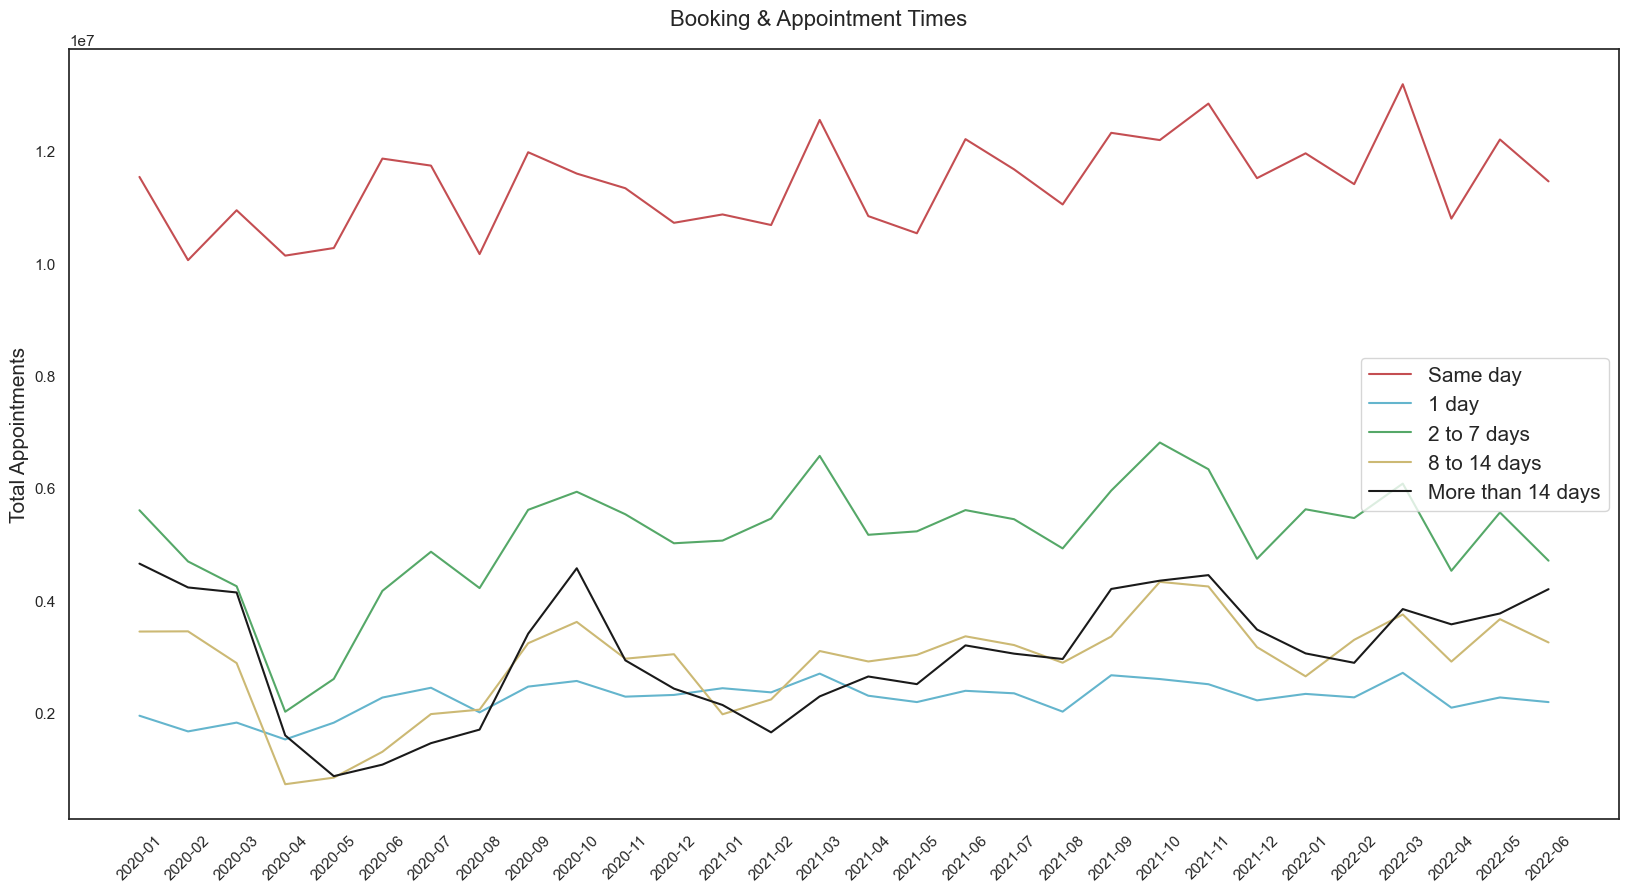

In [128]:
fig7, ax7 = plt.subplots(figsize=(20, 10))

ax7.plot(ar_sameday['appointment_month'], ar_sameday['same_day'], "r")
ax7.plot(ar_1day['appointment_month'], ar_1day['1_day'], "c")
ax7.plot(ar_2to7['appointment_month'], ar_2to7['2_to_7_days'], "g")
ax7.plot(ar_8to14['appointment_month'], ar_8to14['8_to_14_days'], "y")
ax7.plot(ar_15plus['appointment_month'], ar_15plus['More_than_14_days'], "k")
ax7.tick_params(axis='x', labelrotation=45)
ax7.legend(['Same day', '1 day', '2 to 7 days', '8 to 14 days',
           'More than 14 days'], loc=5, fontsize=15)
fig7.suptitle("Booking & Appointment Times", fontsize=16, y=0.92)
ax7.set_ylabel("Total Appointments", fontsize=15)

**Question 6:** How do the spread of service settings compare?

In [129]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc

appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                                            ...                        ...   
817389              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817390              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817391              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817392              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817393              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   

                  context_type                       national_category  \
0       Care Related Encounter  Patient contact during Care Home Round   
1       Care Related Encounter                         Planned Clinics   
2       Care Related Encounter                              Home Visit   
3       Care Related Encounter              General Consultation Acute   
4       Care Related Encounter            Structured Medication Review   
...                        ...                                     ...   
817389  Care Related Encounter             Unplanned Clinical Activity   
817390  Care Related Encounter                         Planned Clinics   
817391  Care Related Encounter              Planned Clinical Procedure   
817392  Care Related Encounter            General Consultation Routine   
817393  Care Related Encounter              General Consultation Acute   

        count_of_appointments appointment_month  
0                           3           2021-08  
1                           7           2021-08  
2                          79           2021-08  
3                         725           2021-08  
4                           2           2021-08  
...                       ...               ...  
817389                     12           2022-06  
817390                      4           2022-06  
817391                     92           2022-06  
817392                      4           2022-06  
817393                     19           2022-06  

[817394 rows x 8 columns]

In [130]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_month2 = nc.groupby('appointment_month')[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
nc_month2


appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078

In [132]:
# Import libraries.
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

%matplotlib inline

In [135]:
# Create a boxplot to investigate spread of service settings.
# Get multiple outputs in the same cell.
InteractiveShell.ast_node_interactivity = 'all'

nc_service_setting = nc.groupby(['appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum().reset_index()

nc_ss_eap = nc_service_setting[nc_service_setting['service_setting']
                               == 'Extended Access Provision']
nc_ss_gp = nc_service_setting[nc_service_setting['service_setting']
                              == 'General Practice']
nc_ss_other = nc_service_setting[nc_service_setting['service_setting'] == 'Other']
nc_ss_pcn = nc_service_setting[nc_service_setting['service_setting']
                               == 'Primary Care Network']
nc_ss_unmapped = nc_service_setting[nc_service_setting['service_setting'] == 'Unmapped']
nc_service_setting.shape

(55, 3)

Text(0.5, 0.92, 'Service settings and total appointments')

Text(0.5, 0, 'Service setting')

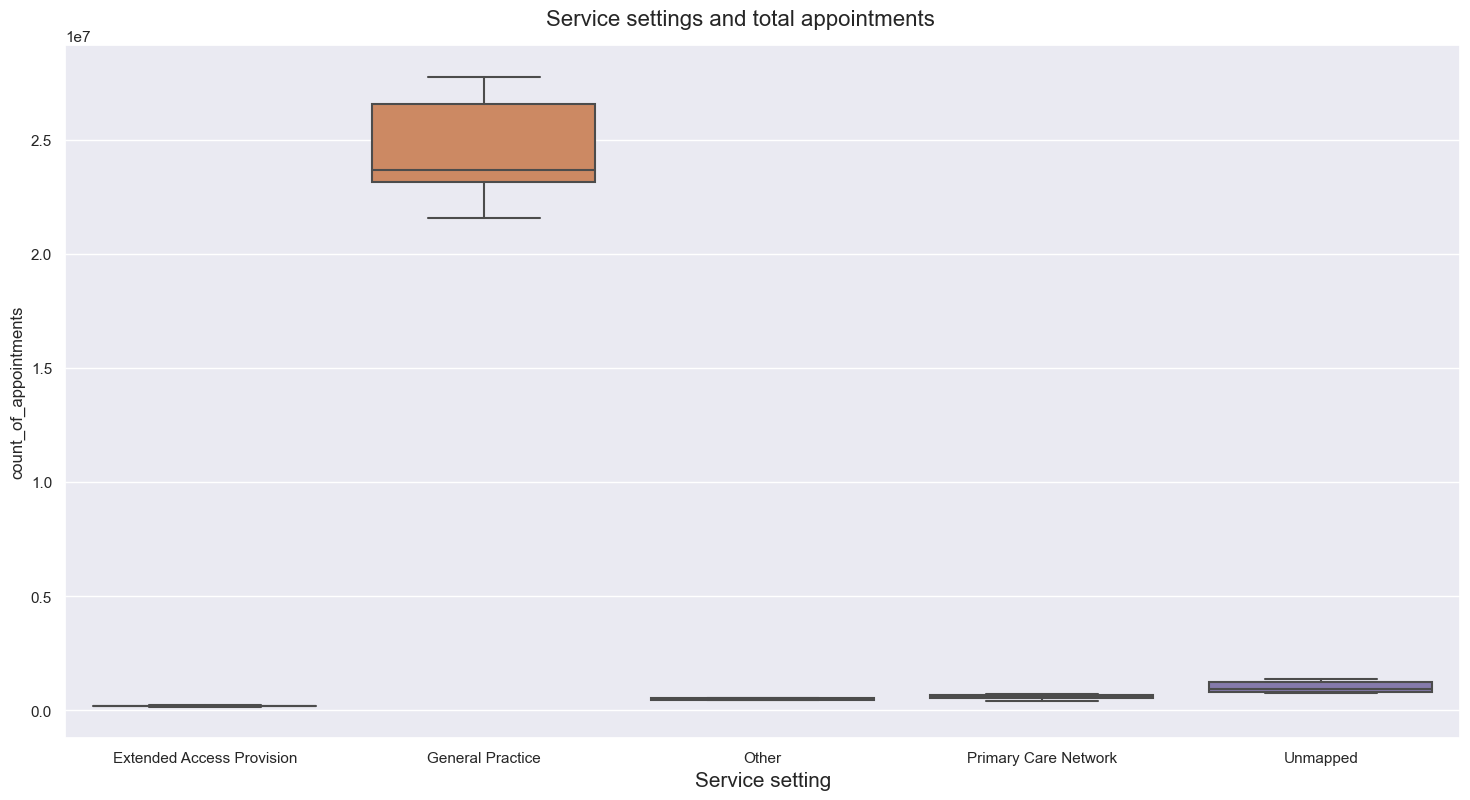

In [137]:
fig9 = plt.figure(figsize=(18, 9))

# Create a boxplot.
ax9 = sns.boxplot(x=nc_service_setting['service_setting'],
                  y=nc_service_setting['count_of_appointments'],
                  whis=1.5)
fig9.suptitle("Service settings and total appointments",
              fontsize=16, y=0.92)
ax9.set_xlabel("Service setting", fontsize=15)

Text(0.5, 0.92, 'Spread of service settings and total appointments (exc. General Practice)')

Text(0.5, 0, 'Service setting')

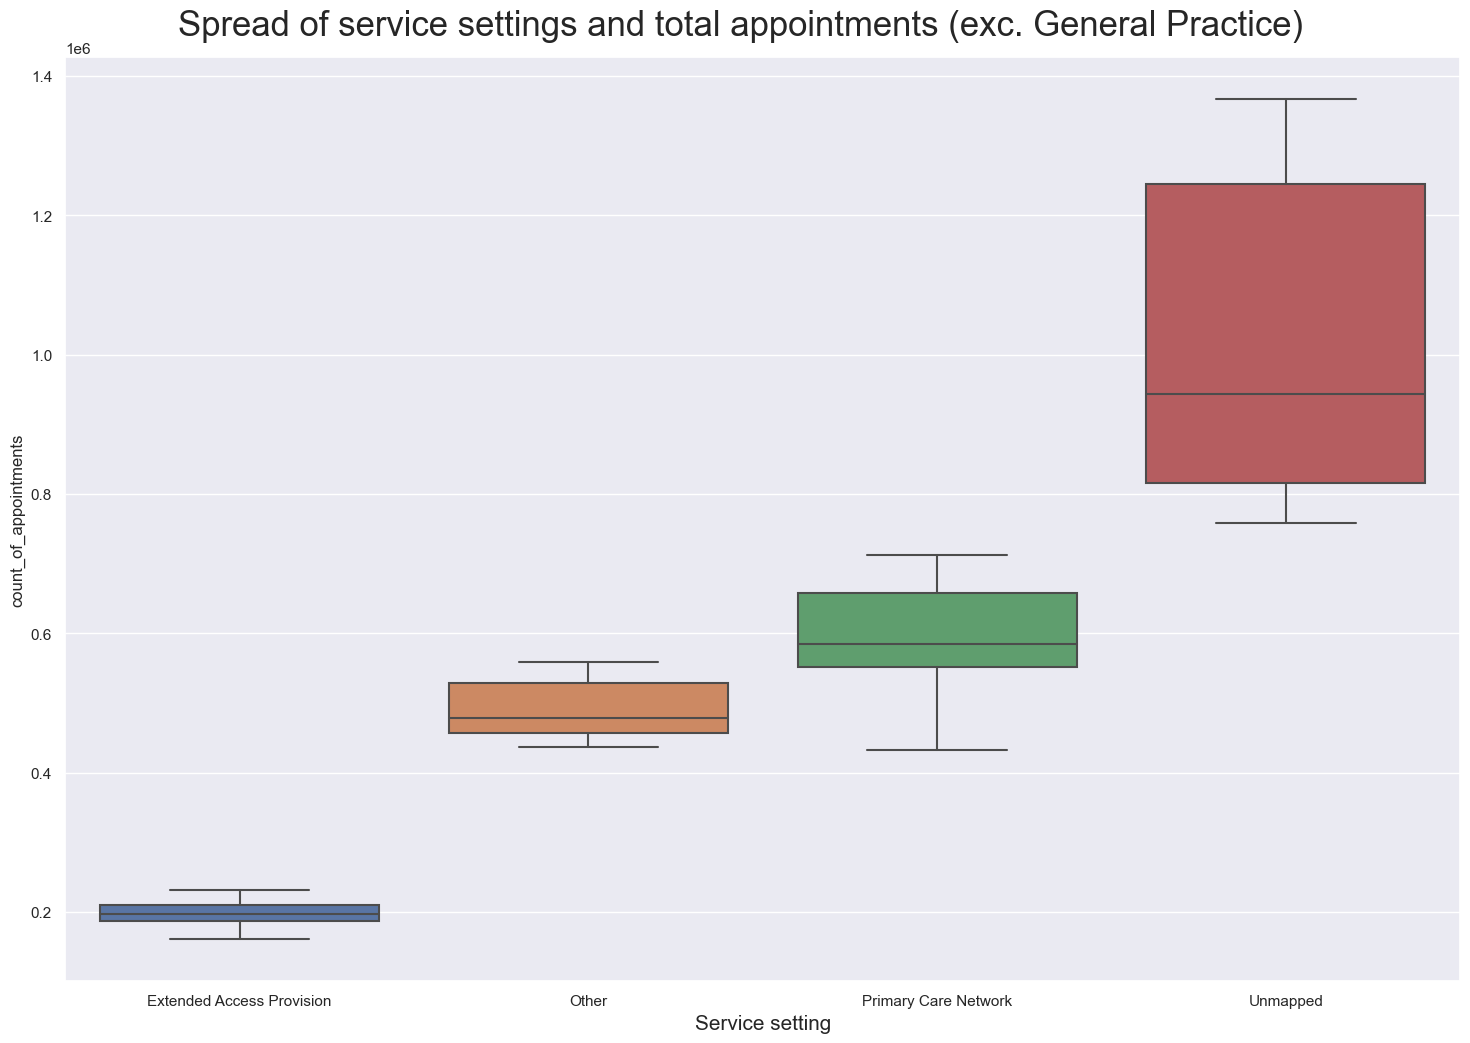

In [139]:

# Create a boxplot to investigate the service settings without GP.


nc_ss_not_gp = nc_service_setting[nc_service_setting['service_setting']
                                  != 'General Practice']

fig11 = plt.figure(figsize=(18, 12))

ax11 = sns.boxplot(x=nc_ss_not_gp['service_setting'],
                   y=nc_ss_not_gp['count_of_appointments'],
                   whis=1.5)

fig11.suptitle(
    "Spread of service settings and total appointments (exc. General Practice)", fontsize=25, y=0.92)
ax11.set_xlabel("Service setting", fontsize=15)

# 

# Provide a summary of your findings and recommendations based on the analysis.

## Summary of findings

### Network capacity and utilisation of resources needs further investigation

Limited decisions could be drawn regarding utilisation of resources. Capacity limits need to be calculated by practice level of spare capacity.
A line-plot best demonstrates that all known appointments that were attended, as they remained between 94-97% on average. However missed appointments equate to a very low percentage of the total.

### Limited decisions with missed appointments or utilisation.

Mondays is the highest level for the appointments and droping at weekends.
Wednesday to Friday is following the Mondays with consistent number.
Weekends are the lowest.

### Appointment Insights.

55 % of the appointments were booked for the same day.
There are two massive peaks of missed appointments in 2020-10 and 2021-10

# Detailed report will provided as an attachment.